# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11769/6000000 [00:00<00:50, 117683.10it/s]

  0%|          | 23792/6000000 [00:00<00:50, 119177.46it/s]

  1%|          | 35710/6000000 [00:00<00:50, 119169.59it/s]

  1%|          | 47627/6000000 [00:00<00:50, 118674.87it/s]

  1%|          | 59501/6000000 [00:00<00:50, 118694.37it/s]

  1%|          | 71371/6000000 [00:00<00:50, 118176.51it/s]

  1%|▏         | 83247/6000000 [00:00<00:49, 118361.09it/s]

  2%|▏         | 95122/6000000 [00:00<00:49, 118481.26it/s]

  2%|▏         | 106971/6000000 [00:00<00:50, 117731.76it/s]

  2%|▏         | 118746/6000000 [00:01<00:50, 117625.06it/s]

  2%|▏         | 130658/6000000 [00:01<00:49, 118078.34it/s]

  2%|▏         | 142546/6000000 [00:01<00:49, 118317.94it/s]

  3%|▎         | 154379/6000000 [00:01<00:49, 118069.02it/s]

  3%|▎         | 166220/6000000 [00:01<00:49, 118169.95it/s]

  3%|▎         | 178352/6000000 [00:01<00:48, 119114.28it/s]

  3%|▎         | 190396/6000000 [00:01<00:48, 119509.91it/s]

  3%|▎         | 202348/6000000 [00:01<00:48, 119496.89it/s]

  4%|▎         | 214298/6000000 [00:01<00:48, 119116.73it/s]

  4%|▍         | 226211/6000000 [00:01<00:48, 118242.83it/s]

  4%|▍         | 238251/6000000 [00:02<00:48, 118884.04it/s]

  4%|▍         | 250365/6000000 [00:02<00:48, 119554.95it/s]

  4%|▍         | 262322/6000000 [00:02<00:48, 119257.54it/s]

  5%|▍         | 274331/6000000 [00:02<00:47, 119503.51it/s]

  5%|▍         | 286283/6000000 [00:02<00:47, 119110.46it/s]

  5%|▍         | 298417/6000000 [00:02<00:47, 119772.05it/s]

  5%|▌         | 310396/6000000 [00:02<00:47, 119258.78it/s]

  5%|▌         | 322359/6000000 [00:02<00:47, 119367.82it/s]

  6%|▌         | 334297/6000000 [00:02<00:47, 119275.02it/s]

  6%|▌         | 346225/6000000 [00:02<00:47, 118941.71it/s]

  6%|▌         | 358120/6000000 [00:03<00:47, 118661.58it/s]

  6%|▌         | 370019/6000000 [00:03<00:47, 118758.34it/s]

  6%|▋         | 381896/6000000 [00:03<00:47, 118620.71it/s]

  7%|▋         | 393759/6000000 [00:03<00:47, 118355.40it/s]

  7%|▋         | 405638/6000000 [00:03<00:47, 118482.71it/s]

  7%|▋         | 417934/6000000 [00:03<00:46, 119821.88it/s]

  7%|▋         | 429917/6000000 [00:03<00:46, 119685.84it/s]

  7%|▋         | 441971/6000000 [00:03<00:46, 119940.81it/s]

  8%|▊         | 453966/6000000 [00:03<00:46, 119634.55it/s]

  8%|▊         | 465930/6000000 [00:03<00:46, 118889.26it/s]

  8%|▊         | 477852/6000000 [00:04<00:46, 118984.92it/s]

  8%|▊         | 489752/6000000 [00:04<00:55, 99782.67it/s] 

  8%|▊         | 501698/6000000 [00:04<00:52, 104965.61it/s]

  9%|▊         | 513446/6000000 [00:04<00:50, 108386.19it/s]

  9%|▉         | 525499/6000000 [00:04<00:48, 111796.86it/s]

  9%|▉         | 537391/6000000 [00:04<00:47, 113834.24it/s]

  9%|▉         | 549336/6000000 [00:04<00:47, 115462.25it/s]

  9%|▉         | 561256/6000000 [00:04<00:46, 116556.59it/s]

 10%|▉         | 573155/6000000 [00:04<00:46, 117271.86it/s]

 10%|▉         | 584954/6000000 [00:04<00:46, 116780.06it/s]

 10%|▉         | 596991/6000000 [00:05<00:45, 117842.25it/s]

 10%|█         | 608812/6000000 [00:05<00:46, 115267.67it/s]

 10%|█         | 620790/6000000 [00:05<00:46, 116589.13it/s]

 11%|█         | 632823/6000000 [00:05<00:45, 117691.46it/s]

 11%|█         | 644923/6000000 [00:05<00:45, 118672.38it/s]

 11%|█         | 656888/6000000 [00:05<00:44, 118962.35it/s]

 11%|█         | 668954/6000000 [00:05<00:44, 119467.07it/s]

 11%|█▏        | 680910/6000000 [00:05<00:44, 119289.69it/s]

 12%|█▏        | 692845/6000000 [00:05<00:44, 118319.97it/s]

 12%|█▏        | 704683/6000000 [00:06<00:45, 117056.30it/s]

 12%|█▏        | 716546/6000000 [00:06<00:44, 117520.80it/s]

 12%|█▏        | 728488/6000000 [00:06<00:44, 118083.58it/s]

 12%|█▏        | 740309/6000000 [00:06<00:44, 118118.60it/s]

 13%|█▎        | 752424/6000000 [00:06<00:44, 119021.65it/s]

 13%|█▎        | 764343/6000000 [00:06<00:43, 119070.66it/s]

 13%|█▎        | 776252/6000000 [00:06<00:43, 118970.28it/s]

 13%|█▎        | 788151/6000000 [00:06<00:43, 118908.92it/s]

 13%|█▎        | 800043/6000000 [00:06<00:43, 118829.40it/s]

 14%|█▎        | 811958/6000000 [00:06<00:43, 118922.72it/s]

 14%|█▎        | 823851/6000000 [00:07<00:44, 117378.67it/s]

 14%|█▍        | 835774/6000000 [00:07<00:43, 117926.26it/s]

 14%|█▍        | 847753/6000000 [00:07<00:43, 118480.37it/s]

 14%|█▍        | 859605/6000000 [00:07<00:43, 118069.81it/s]

 15%|█▍        | 871531/6000000 [00:07<00:43, 118422.75it/s]

 15%|█▍        | 883385/6000000 [00:07<00:43, 118456.54it/s]

 15%|█▍        | 895315/6000000 [00:07<00:43, 118707.68it/s]

 15%|█▌        | 907245/6000000 [00:07<00:42, 118883.60it/s]

 15%|█▌        | 919271/6000000 [00:07<00:42, 119294.33it/s]

 16%|█▌        | 931272/6000000 [00:07<00:42, 119508.33it/s]

 16%|█▌        | 943224/6000000 [00:08<00:42, 119276.57it/s]

 16%|█▌        | 955153/6000000 [00:08<00:42, 119086.28it/s]

 16%|█▌        | 967062/6000000 [00:08<00:42, 119074.51it/s]

 16%|█▋        | 978970/6000000 [00:08<00:42, 119028.51it/s]

 17%|█▋        | 990902/6000000 [00:08<00:42, 119114.58it/s]

 17%|█▋        | 1002814/6000000 [00:08<00:41, 118993.73it/s]

 17%|█▋        | 1014761/6000000 [00:08<00:41, 119133.97it/s]

 17%|█▋        | 1026675/6000000 [00:08<00:41, 118721.85it/s]

 17%|█▋        | 1038742/6000000 [00:08<00:41, 119302.61it/s]

 18%|█▊        | 1050683/6000000 [00:08<00:41, 119327.55it/s]

 18%|█▊        | 1062617/6000000 [00:09<00:42, 117452.62it/s]

 18%|█▊        | 1074688/6000000 [00:09<00:41, 118416.53it/s]

 18%|█▊        | 1086587/6000000 [00:09<00:41, 118584.61it/s]

 18%|█▊        | 1098452/6000000 [00:09<00:41, 118602.20it/s]

 19%|█▊        | 1110316/6000000 [00:09<00:41, 118521.01it/s]

 19%|█▊        | 1122216/6000000 [00:09<00:41, 118661.70it/s]

 19%|█▉        | 1134115/6000000 [00:09<00:40, 118756.84it/s]

 19%|█▉        | 1146001/6000000 [00:09<00:40, 118528.80it/s]

 19%|█▉        | 1158001/6000000 [00:09<00:40, 118679.55it/s]

 20%|█▉        | 1170001/6000000 [00:09<00:40, 118880.61it/s]

 20%|█▉        | 1182001/6000000 [00:10<00:40, 119115.82it/s]

 20%|█▉        | 1194003/6000000 [00:10<00:40, 119371.70it/s]

 20%|██        | 1206002/6000000 [00:10<00:40, 119504.18it/s]

 20%|██        | 1218019/6000000 [00:10<00:39, 119701.95it/s]

 21%|██        | 1230001/6000000 [00:10<00:39, 119681.44it/s]

 21%|██        | 1242001/6000000 [00:10<00:39, 119640.10it/s]

 21%|██        | 1254001/6000000 [00:10<00:39, 119644.80it/s]

 21%|██        | 1266001/6000000 [00:10<00:39, 119698.56it/s]

 21%|██▏       | 1278001/6000000 [00:10<00:39, 119640.90it/s]

 22%|██▏       | 1290001/6000000 [00:10<00:39, 119443.38it/s]

 22%|██▏       | 1301946/6000000 [00:11<00:39, 118049.86it/s]

 22%|██▏       | 1313830/6000000 [00:11<00:39, 118282.21it/s]

 22%|██▏       | 1325661/6000000 [00:11<00:39, 118285.48it/s]

 22%|██▏       | 1337730/6000000 [00:11<00:39, 119000.35it/s]

 22%|██▏       | 1349775/6000000 [00:11<00:38, 119432.16it/s]

 23%|██▎       | 1361856/6000000 [00:11<00:38, 119841.50it/s]

 23%|██▎       | 1373862/6000000 [00:11<00:38, 119905.34it/s]

 23%|██▎       | 1385854/6000000 [00:11<00:38, 119729.39it/s]

 23%|██▎       | 1397976/6000000 [00:11<00:38, 120170.59it/s]

 23%|██▎       | 1409994/6000000 [00:11<00:38, 119160.36it/s]

 24%|██▎       | 1421948/6000000 [00:12<00:38, 119272.65it/s]

 24%|██▍       | 1433991/6000000 [00:12<00:38, 119615.66it/s]

 24%|██▍       | 1445954/6000000 [00:12<00:38, 119597.47it/s]

 24%|██▍       | 1457928/6000000 [00:12<00:37, 119637.94it/s]

 25%|██▍       | 1470001/6000000 [00:12<00:37, 119368.08it/s]

 25%|██▍       | 1482080/6000000 [00:12<00:37, 119790.37it/s]

 25%|██▍       | 1494065/6000000 [00:12<00:37, 119806.61it/s]

 25%|██▌       | 1506047/6000000 [00:12<00:37, 119215.93it/s]

 25%|██▌       | 1518001/6000000 [00:12<00:37, 119182.67it/s]

 26%|██▌       | 1530001/6000000 [00:12<00:37, 119055.73it/s]

 26%|██▌       | 1542001/6000000 [00:13<00:37, 119047.71it/s]

 26%|██▌       | 1554001/6000000 [00:13<00:37, 118755.79it/s]

 26%|██▌       | 1566097/6000000 [00:13<00:37, 119411.61it/s]

 26%|██▋       | 1578213/6000000 [00:13<00:36, 119930.46it/s]

 27%|██▋       | 1590207/6000000 [00:13<00:36, 119863.04it/s]

 27%|██▋       | 1602194/6000000 [00:13<00:36, 119544.58it/s]

 27%|██▋       | 1614318/6000000 [00:13<00:36, 120048.44it/s]

 27%|██▋       | 1626324/6000000 [00:13<00:36, 119993.39it/s]

 27%|██▋       | 1638324/6000000 [00:13<00:36, 119251.01it/s]

 28%|██▊       | 1650251/6000000 [00:13<00:36, 119142.60it/s]

 28%|██▊       | 1662234/6000000 [00:14<00:36, 119346.50it/s]

 28%|██▊       | 1674170/6000000 [00:14<00:36, 119116.90it/s]

 28%|██▊       | 1686278/6000000 [00:14<00:36, 119701.10it/s]

 28%|██▊       | 1698259/6000000 [00:14<00:35, 119730.90it/s]

 29%|██▊       | 1710285/6000000 [00:14<00:35, 119887.31it/s]

 29%|██▊       | 1722402/6000000 [00:14<00:35, 120268.64it/s]

 29%|██▉       | 1734430/6000000 [00:14<00:35, 120101.98it/s]

 29%|██▉       | 1746441/6000000 [00:14<00:35, 120005.44it/s]

 29%|██▉       | 1758442/6000000 [00:14<00:35, 119863.40it/s]

 30%|██▉       | 1770429/6000000 [00:14<00:35, 119418.50it/s]

 30%|██▉       | 1782394/6000000 [00:15<00:35, 119484.30it/s]

 30%|██▉       | 1794453/6000000 [00:15<00:35, 119814.33it/s]

 30%|███       | 1806435/6000000 [00:15<00:35, 119529.71it/s]

 30%|███       | 1818389/6000000 [00:15<00:35, 118944.81it/s]

 31%|███       | 1830285/6000000 [00:15<00:35, 118344.01it/s]

 31%|███       | 1842121/6000000 [00:15<00:35, 117901.52it/s]

 31%|███       | 1854001/6000000 [00:15<00:35, 118052.44it/s]

 31%|███       | 1865917/6000000 [00:15<00:34, 118381.67it/s]

 31%|███▏      | 1877756/6000000 [00:15<00:35, 117717.07it/s]

 31%|███▏      | 1889529/6000000 [00:15<00:35, 117398.44it/s]

 32%|███▏      | 1901270/6000000 [00:16<00:34, 117178.08it/s]

 32%|███▏      | 1912989/6000000 [00:16<00:35, 116164.71it/s]

 32%|███▏      | 1924724/6000000 [00:16<00:34, 116514.83it/s]

 32%|███▏      | 1936445/6000000 [00:16<00:34, 116719.82it/s]

 32%|███▏      | 1948165/6000000 [00:16<00:34, 116862.59it/s]

 33%|███▎      | 1960111/6000000 [00:16<00:34, 117637.45it/s]

 33%|███▎      | 1971983/6000000 [00:16<00:34, 117959.41it/s]

 33%|███▎      | 1983782/6000000 [00:16<00:34, 117967.34it/s]

 33%|███▎      | 1995727/6000000 [00:16<00:33, 118410.60it/s]

 33%|███▎      | 2007569/6000000 [00:16<00:33, 118397.03it/s]

 34%|███▎      | 2019409/6000000 [00:17<00:33, 118088.03it/s]

 34%|███▍      | 2031219/6000000 [00:17<00:33, 117916.96it/s]

 34%|███▍      | 2043270/6000000 [00:17<00:33, 118691.65it/s]

 34%|███▍      | 2055218/6000000 [00:17<00:33, 118925.87it/s]

 34%|███▍      | 2067111/6000000 [00:17<00:33, 118843.27it/s]

 35%|███▍      | 2079001/6000000 [00:17<00:33, 118758.18it/s]

 35%|███▍      | 2091001/6000000 [00:17<00:32, 118960.09it/s]

 35%|███▌      | 2102932/6000000 [00:17<00:32, 119062.07it/s]

 35%|███▌      | 2114839/6000000 [00:17<00:32, 118149.96it/s]

 35%|███▌      | 2126728/6000000 [00:17<00:32, 118369.15it/s]

 36%|███▌      | 2138576/6000000 [00:18<00:32, 118400.68it/s]

 36%|███▌      | 2150417/6000000 [00:18<00:32, 117999.00it/s]

 36%|███▌      | 2162218/6000000 [00:18<00:32, 117978.72it/s]

 36%|███▌      | 2174052/6000000 [00:18<00:32, 118083.99it/s]

 36%|███▋      | 2185861/6000000 [00:18<00:32, 118040.42it/s]

 37%|███▋      | 2197784/6000000 [00:18<00:32, 118395.79it/s]

 37%|███▋      | 2209669/6000000 [00:18<00:31, 118530.04it/s]

 37%|███▋      | 2221634/6000000 [00:18<00:31, 118864.47it/s]

 37%|███▋      | 2233632/6000000 [00:18<00:31, 119198.08it/s]

 37%|███▋      | 2245711/6000000 [00:18<00:31, 119673.83it/s]

 38%|███▊      | 2257679/6000000 [00:19<00:31, 119612.77it/s]

 38%|███▊      | 2269641/6000000 [00:19<00:31, 118918.19it/s]

 38%|███▊      | 2281534/6000000 [00:19<00:31, 118821.58it/s]

 38%|███▊      | 2293417/6000000 [00:19<00:31, 118182.34it/s]

 38%|███▊      | 2305331/6000000 [00:19<00:31, 118465.47it/s]

 39%|███▊      | 2317283/6000000 [00:19<00:31, 118777.39it/s]

 39%|███▉      | 2329162/6000000 [00:19<00:31, 115390.14it/s]

 39%|███▉      | 2340722/6000000 [00:19<00:32, 111474.70it/s]

 39%|███▉      | 2352601/6000000 [00:19<00:32, 113580.91it/s]

 39%|███▉      | 2364547/6000000 [00:19<00:31, 115292.49it/s]

 40%|███▉      | 2376485/6000000 [00:20<00:31, 116493.38it/s]

 40%|███▉      | 2388348/6000000 [00:20<00:30, 117123.73it/s]

 40%|████      | 2400579/6000000 [00:20<00:30, 118663.40it/s]

 40%|████      | 2412716/6000000 [00:20<00:30, 119468.75it/s]

 40%|████      | 2424747/6000000 [00:20<00:29, 119717.03it/s]

 41%|████      | 2436726/6000000 [00:20<00:29, 119536.26it/s]

 41%|████      | 2448803/6000000 [00:20<00:29, 119902.10it/s]

 41%|████      | 2460797/6000000 [00:20<00:29, 119725.38it/s]

 41%|████      | 2472909/6000000 [00:20<00:29, 120141.66it/s]

 41%|████▏     | 2484974/6000000 [00:20<00:29, 120290.88it/s]

 42%|████▏     | 2497005/6000000 [00:21<00:29, 120082.66it/s]

 42%|████▏     | 2509015/6000000 [00:21<00:29, 117838.83it/s]

 42%|████▏     | 2521057/6000000 [00:21<00:29, 118601.13it/s]

 42%|████▏     | 2533057/6000000 [00:21<00:29, 119015.88it/s]

 42%|████▏     | 2544965/6000000 [00:21<00:29, 118631.03it/s]

 43%|████▎     | 2556833/6000000 [00:21<00:29, 118475.41it/s]

 43%|████▎     | 2568819/6000000 [00:21<00:28, 118886.54it/s]

 43%|████▎     | 2580710/6000000 [00:21<00:28, 118534.41it/s]

 43%|████▎     | 2592611/6000000 [00:21<00:28, 118675.03it/s]

 43%|████▎     | 2604599/6000000 [00:21<00:28, 119033.20it/s]

 44%|████▎     | 2616528/6000000 [00:22<00:28, 119106.42it/s]

 44%|████▍     | 2628440/6000000 [00:22<00:28, 118918.05it/s]

 44%|████▍     | 2640342/6000000 [00:22<00:28, 118947.07it/s]

 44%|████▍     | 2652593/6000000 [00:22<00:27, 120012.54it/s]

 44%|████▍     | 2664595/6000000 [00:22<00:27, 119720.42it/s]

 45%|████▍     | 2676616/6000000 [00:22<00:27, 119863.11it/s]

 45%|████▍     | 2688603/6000000 [00:22<00:27, 119535.52it/s]

 45%|████▌     | 2700559/6000000 [00:22<00:27, 119542.11it/s]

 45%|████▌     | 2712514/6000000 [00:22<00:27, 119490.78it/s]

 45%|████▌     | 2724464/6000000 [00:22<00:27, 119461.51it/s]

 46%|████▌     | 2736411/6000000 [00:23<00:34, 95069.00it/s] 

 46%|████▌     | 2748459/6000000 [00:23<00:32, 101522.40it/s]

 46%|████▌     | 2760529/6000000 [00:23<00:30, 106627.41it/s]

 46%|████▌     | 2772391/6000000 [00:23<00:29, 109929.53it/s]

 46%|████▋     | 2784349/6000000 [00:23<00:28, 112652.85it/s]

 47%|████▋     | 2796215/6000000 [00:23<00:28, 114377.89it/s]

 47%|████▋     | 2808122/6000000 [00:23<00:27, 115741.62it/s]

 47%|████▋     | 2820001/6000000 [00:23<00:27, 116466.60it/s]

 47%|████▋     | 2832001/6000000 [00:23<00:27, 117179.75it/s]

 47%|████▋     | 2844050/6000000 [00:24<00:26, 118158.60it/s]

 48%|████▊     | 2856002/6000000 [00:24<00:26, 118516.19it/s]

 48%|████▊     | 2868056/6000000 [00:24<00:26, 119116.68it/s]

 48%|████▊     | 2880192/6000000 [00:24<00:26, 119784.83it/s]

 48%|████▊     | 2892191/6000000 [00:24<00:25, 119705.06it/s]

 48%|████▊     | 2904176/6000000 [00:24<00:25, 119592.40it/s]

 49%|████▊     | 2916145/6000000 [00:24<00:25, 119499.35it/s]

 49%|████▉     | 2928229/6000000 [00:24<00:25, 119897.34it/s]

 49%|████▉     | 2940368/6000000 [00:24<00:25, 120342.36it/s]

 49%|████▉     | 2952406/6000000 [00:24<00:25, 120183.37it/s]

 49%|████▉     | 2964458/6000000 [00:25<00:25, 120281.62it/s]

 50%|████▉     | 2976488/6000000 [00:25<00:25, 117418.30it/s]

 50%|████▉     | 2988394/6000000 [00:25<00:25, 117899.43it/s]

 50%|█████     | 3000353/6000000 [00:25<00:25, 118397.43it/s]

 50%|█████     | 3012414/6000000 [00:25<00:25, 119054.78it/s]

 50%|█████     | 3024532/6000000 [00:25<00:24, 119687.49it/s]

 51%|█████     | 3036506/6000000 [00:25<00:24, 119568.42it/s]

 51%|█████     | 3048724/6000000 [00:25<00:24, 120347.12it/s]

 51%|█████     | 3060762/6000000 [00:25<00:24, 120085.71it/s]

 51%|█████     | 3072773/6000000 [00:25<00:24, 119752.94it/s]

 51%|█████▏    | 3084750/6000000 [00:26<00:24, 119346.56it/s]

 52%|█████▏    | 3096785/6000000 [00:26<00:24, 119644.02it/s]

 52%|█████▏    | 3108751/6000000 [00:26<00:24, 117701.57it/s]

 52%|█████▏    | 3120688/6000000 [00:26<00:24, 118194.22it/s]

 52%|█████▏    | 3132766/6000000 [00:26<00:24, 118959.33it/s]

 52%|█████▏    | 3144711/6000000 [00:26<00:23, 119104.85it/s]

 53%|█████▎    | 3156687/6000000 [00:26<00:23, 119297.41it/s]

 53%|█████▎    | 3168779/6000000 [00:26<00:23, 119779.55it/s]

 53%|█████▎    | 3180782/6000000 [00:26<00:23, 119854.11it/s]

 53%|█████▎    | 3192947/6000000 [00:27<00:23, 120391.47it/s]

 53%|█████▎    | 3204988/6000000 [00:27<00:23, 120080.25it/s]

 54%|█████▎    | 3216997/6000000 [00:27<00:23, 119797.95it/s]

 54%|█████▍    | 3228978/6000000 [00:27<00:23, 115865.74it/s]

 54%|█████▍    | 3240973/6000000 [00:27<00:23, 117057.06it/s]

 54%|█████▍    | 3252858/6000000 [00:27<00:23, 117584.57it/s]

 54%|█████▍    | 3264768/6000000 [00:27<00:23, 118030.76it/s]

 55%|█████▍    | 3276722/6000000 [00:27<00:22, 118478.57it/s]

 55%|█████▍    | 3289083/6000000 [00:27<00:22, 120006.19it/s]

 55%|█████▌    | 3301091/6000000 [00:27<00:22, 119655.67it/s]

 55%|█████▌    | 3313062/6000000 [00:28<00:22, 119652.08it/s]

 55%|█████▌    | 3325031/6000000 [00:28<00:22, 119603.96it/s]

 56%|█████▌    | 3336994/6000000 [00:28<00:22, 119537.62it/s]

 56%|█████▌    | 3348950/6000000 [00:28<00:22, 119167.39it/s]

 56%|█████▌    | 3361018/6000000 [00:28<00:22, 119618.54it/s]

 56%|█████▌    | 3372996/6000000 [00:28<00:21, 119665.25it/s]

 56%|█████▋    | 3384964/6000000 [00:28<00:21, 119501.06it/s]

 57%|█████▋    | 3396915/6000000 [00:28<00:21, 119362.98it/s]

 57%|█████▋    | 3408852/6000000 [00:28<00:21, 119361.71it/s]

 57%|█████▋    | 3420789/6000000 [00:28<00:21, 119133.88it/s]

 57%|█████▋    | 3432919/6000000 [00:29<00:21, 119779.16it/s]

 57%|█████▋    | 3444898/6000000 [00:29<00:21, 119574.65it/s]

 58%|█████▊    | 3456856/6000000 [00:29<00:21, 119396.37it/s]

 58%|█████▊    | 3468796/6000000 [00:29<00:21, 118942.26it/s]

 58%|█████▊    | 3481030/6000000 [00:29<00:20, 119955.62it/s]

 58%|█████▊    | 3493027/6000000 [00:29<00:20, 119587.97it/s]

 58%|█████▊    | 3504987/6000000 [00:29<00:20, 119467.99it/s]

 59%|█████▊    | 3516935/6000000 [00:29<00:20, 119448.12it/s]

 59%|█████▉    | 3528983/6000000 [00:29<00:20, 119750.95it/s]

 59%|█████▉    | 3540959/6000000 [00:29<00:20, 119648.56it/s]

 59%|█████▉    | 3552925/6000000 [00:30<00:20, 119340.83it/s]

 59%|█████▉    | 3564860/6000000 [00:30<00:20, 119244.99it/s]

 60%|█████▉    | 3576785/6000000 [00:30<00:20, 118576.38it/s]

 60%|█████▉    | 3588644/6000000 [00:30<00:21, 114668.46it/s]

 60%|██████    | 3600455/6000000 [00:30<00:20, 115671.59it/s]

 60%|██████    | 3612603/6000000 [00:30<00:20, 117378.35it/s]

 60%|██████    | 3624834/6000000 [00:30<00:19, 118836.18it/s]

 61%|██████    | 3636759/6000000 [00:30<00:19, 118957.99it/s]

 61%|██████    | 3648666/6000000 [00:30<00:19, 118743.05it/s]

 61%|██████    | 3660627/6000000 [00:30<00:19, 119000.96it/s]

 61%|██████    | 3672607/6000000 [00:31<00:19, 119239.07it/s]

 61%|██████▏   | 3684732/6000000 [00:31<00:19, 119837.81it/s]

 62%|██████▏   | 3696804/6000000 [00:31<00:19, 120101.16it/s]

 62%|██████▏   | 3708817/6000000 [00:31<00:19, 114739.54it/s]

 62%|██████▏   | 3720764/6000000 [00:31<00:19, 116111.34it/s]

 62%|██████▏   | 3732838/6000000 [00:31<00:19, 117466.90it/s]

 62%|██████▏   | 3744779/6000000 [00:31<00:19, 118038.43it/s]

 63%|██████▎   | 3757019/6000000 [00:31<00:18, 119331.04it/s]

 63%|██████▎   | 3768970/6000000 [00:31<00:18, 119048.68it/s]

 63%|██████▎   | 3780888/6000000 [00:31<00:18, 118648.37it/s]

 63%|██████▎   | 3792994/6000000 [00:32<00:18, 119363.19it/s]

 63%|██████▎   | 3804937/6000000 [00:32<00:18, 119215.18it/s]

 64%|██████▎   | 3816864/6000000 [00:32<00:18, 119174.83it/s]

 64%|██████▍   | 3828785/6000000 [00:32<00:18, 116004.68it/s]

 64%|██████▍   | 3840656/6000000 [00:32<00:18, 116796.13it/s]

 64%|██████▍   | 3852803/6000000 [00:32<00:18, 118175.95it/s]

 64%|██████▍   | 3864693/6000000 [00:32<00:18, 118388.88it/s]

 65%|██████▍   | 3876578/6000000 [00:32<00:17, 118523.60it/s]

 65%|██████▍   | 3888528/6000000 [00:32<00:17, 118813.07it/s]

 65%|██████▌   | 3900415/6000000 [00:32<00:17, 118669.78it/s]

 65%|██████▌   | 3912382/6000000 [00:33<00:17, 118967.55it/s]

 65%|██████▌   | 3924442/6000000 [00:33<00:17, 119455.08it/s]

 66%|██████▌   | 3936453/6000000 [00:33<00:17, 119649.37it/s]

 66%|██████▌   | 3948420/6000000 [00:33<00:17, 116308.40it/s]

 66%|██████▌   | 3960301/6000000 [00:33<00:17, 117042.39it/s]

 66%|██████▌   | 3972280/6000000 [00:33<00:17, 117853.33it/s]

 66%|██████▋   | 3984291/6000000 [00:33<00:17, 118521.43it/s]

 67%|██████▋   | 3996318/6000000 [00:33<00:16, 119039.14it/s]

 67%|██████▋   | 4008229/6000000 [00:33<00:16, 118662.25it/s]

 67%|██████▋   | 4020408/6000000 [00:33<00:16, 119592.88it/s]

 67%|██████▋   | 4032372/6000000 [00:34<00:16, 119442.53it/s]

 67%|██████▋   | 4044320/6000000 [00:34<00:16, 119187.88it/s]

 68%|██████▊   | 4056329/6000000 [00:34<00:16, 119455.27it/s]

 68%|██████▊   | 4068277/6000000 [00:34<00:16, 116402.61it/s]

 68%|██████▊   | 4080143/6000000 [00:34<00:16, 117063.35it/s]

 68%|██████▊   | 4092107/6000000 [00:34<00:16, 117824.15it/s]

 68%|██████▊   | 4104001/6000000 [00:34<00:16, 118063.63it/s]

 69%|██████▊   | 4116001/6000000 [00:34<00:15, 118128.09it/s]

 69%|██████▉   | 4128001/6000000 [00:34<00:15, 118425.30it/s]

 69%|██████▉   | 4140046/6000000 [00:34<00:15, 119027.25it/s]

 69%|██████▉   | 4152059/6000000 [00:35<00:15, 119355.04it/s]

 69%|██████▉   | 4164001/6000000 [00:35<00:15, 119153.03it/s]

 70%|██████▉   | 4176001/6000000 [00:35<00:15, 119149.54it/s]

 70%|██████▉   | 4188231/6000000 [00:35<00:15, 120089.81it/s]

 70%|███████   | 4200242/6000000 [00:35<00:15, 116883.70it/s]

 70%|███████   | 4212140/6000000 [00:35<00:15, 117497.99it/s]

 70%|███████   | 4224003/6000000 [00:35<00:15, 117776.59it/s]

 71%|███████   | 4235792/6000000 [00:35<00:15, 116834.83it/s]

 71%|███████   | 4247850/6000000 [00:35<00:14, 117942.06it/s]

 71%|███████   | 4259877/6000000 [00:36<00:14, 118630.83it/s]

 71%|███████   | 4271852/6000000 [00:36<00:14, 118962.72it/s]

 71%|███████▏  | 4283858/6000000 [00:36<00:14, 119288.03it/s]

 72%|███████▏  | 4295929/6000000 [00:36<00:14, 119711.82it/s]

 72%|███████▏  | 4307937/6000000 [00:36<00:14, 119819.57it/s]

 72%|███████▏  | 4319921/6000000 [00:36<00:14, 119266.26it/s]

 72%|███████▏  | 4331850/6000000 [00:36<00:14, 119129.85it/s]

 72%|███████▏  | 4343810/6000000 [00:36<00:13, 119268.08it/s]

 73%|███████▎  | 4355802/6000000 [00:36<00:13, 119460.34it/s]

 73%|███████▎  | 4367749/6000000 [00:36<00:13, 119182.42it/s]

 73%|███████▎  | 4379935/6000000 [00:37<00:13, 119980.22it/s]

 73%|███████▎  | 4391934/6000000 [00:37<00:13, 119273.04it/s]

 73%|███████▎  | 4403904/6000000 [00:37<00:13, 119398.57it/s]

 74%|███████▎  | 4416000/6000000 [00:37<00:13, 119862.70it/s]

 74%|███████▍  | 4427988/6000000 [00:37<00:13, 119714.13it/s]

 74%|███████▍  | 4439961/6000000 [00:37<00:13, 115282.98it/s]

 74%|███████▍  | 4451882/6000000 [00:37<00:13, 116425.14it/s]

 74%|███████▍  | 4463775/6000000 [00:37<00:13, 117159.77it/s]

 75%|███████▍  | 4475610/6000000 [00:37<00:12, 117509.46it/s]

 75%|███████▍  | 4487455/6000000 [00:37<00:12, 117786.86it/s]

 75%|███████▍  | 4499441/6000000 [00:38<00:12, 118402.33it/s]

 75%|███████▌  | 4511466/6000000 [00:38<00:12, 118952.43it/s]

 75%|███████▌  | 4523368/6000000 [00:38<00:12, 118866.42it/s]

 76%|███████▌  | 4535343/6000000 [00:38<00:12, 119128.94it/s]

 76%|███████▌  | 4547331/6000000 [00:38<00:12, 119353.30it/s]

 76%|███████▌  | 4559269/6000000 [00:38<00:12, 114544.67it/s]

 76%|███████▌  | 4571095/6000000 [00:38<00:12, 115623.47it/s]

 76%|███████▋  | 4583092/6000000 [00:38<00:12, 116897.54it/s]

 77%|███████▋  | 4594972/6000000 [00:38<00:11, 117458.23it/s]

 77%|███████▋  | 4606814/6000000 [00:38<00:11, 117741.29it/s]

 77%|███████▋  | 4618604/6000000 [00:39<00:11, 117785.83it/s]

 77%|███████▋  | 4630395/6000000 [00:39<00:11, 117821.92it/s]

 77%|███████▋  | 4642479/6000000 [00:39<00:11, 118722.92it/s]

 78%|███████▊  | 4654495/6000000 [00:39<00:11, 119150.43it/s]

 78%|███████▊  | 4666414/6000000 [00:39<00:11, 119001.06it/s]

 78%|███████▊  | 4678317/6000000 [00:39<00:11, 117003.75it/s]

 78%|███████▊  | 4690311/6000000 [00:39<00:11, 117870.87it/s]

 78%|███████▊  | 4702492/6000000 [00:39<00:10, 119039.48it/s]

 79%|███████▊  | 4714403/6000000 [00:39<00:10, 119005.06it/s]

 79%|███████▉  | 4726398/6000000 [00:39<00:10, 119284.37it/s]

 79%|███████▉  | 4738343/6000000 [00:40<00:10, 119332.39it/s]

 79%|███████▉  | 4750425/6000000 [00:40<00:10, 119775.55it/s]

 79%|███████▉  | 4762405/6000000 [00:40<00:10, 119593.77it/s]

 80%|███████▉  | 4774433/6000000 [00:40<00:10, 119797.31it/s]

 80%|███████▉  | 4786414/6000000 [00:40<00:10, 119433.06it/s]

 80%|███████▉  | 4798359/6000000 [00:40<00:10, 115178.59it/s]

 80%|████████  | 4810263/6000000 [00:40<00:10, 116303.32it/s]

 80%|████████  | 4822095/6000000 [00:40<00:10, 116893.73it/s]

 81%|████████  | 4834262/6000000 [00:40<00:09, 118304.35it/s]

 81%|████████  | 4846108/6000000 [00:40<00:09, 118214.13it/s]

 81%|████████  | 4857941/6000000 [00:41<00:09, 118127.25it/s]

 81%|████████  | 4869992/6000000 [00:41<00:09, 118836.28it/s]

 81%|████████▏ | 4881925/6000000 [00:41<00:09, 118982.70it/s]

 82%|████████▏ | 4894025/6000000 [00:41<00:09, 119584.25it/s]

 82%|████████▏ | 4905987/6000000 [00:41<00:09, 119276.75it/s]

 82%|████████▏ | 4917917/6000000 [00:41<00:09, 113950.35it/s]

 82%|████████▏ | 4929771/6000000 [00:41<00:09, 115279.49it/s]

 82%|████████▏ | 4941637/6000000 [00:41<00:09, 116267.73it/s]

 83%|████████▎ | 4953606/6000000 [00:41<00:08, 117275.04it/s]

 83%|████████▎ | 4965438/6000000 [00:41<00:08, 117582.07it/s]

 83%|████████▎ | 4977213/6000000 [00:42<00:11, 88825.67it/s] 

 83%|████████▎ | 4989256/6000000 [00:42<00:10, 96502.22it/s]

 83%|████████▎ | 5001184/6000000 [00:42<00:09, 102368.77it/s]

 84%|████████▎ | 5013263/6000000 [00:42<00:09, 107323.51it/s]

 84%|████████▍ | 5025017/6000000 [00:42<00:08, 110158.45it/s]

 84%|████████▍ | 5037001/6000000 [00:42<00:08, 112628.20it/s]

 84%|████████▍ | 5049002/6000000 [00:42<00:08, 114729.66it/s]

 84%|████████▍ | 5061001/6000000 [00:42<00:08, 115829.25it/s]

 85%|████████▍ | 5073005/6000000 [00:42<00:07, 117060.92it/s]

 85%|████████▍ | 5085002/6000000 [00:43<00:07, 117879.39it/s]

 85%|████████▍ | 5097001/6000000 [00:43<00:07, 118355.49it/s]

 85%|████████▌ | 5109001/6000000 [00:43<00:07, 118321.76it/s]

 85%|████████▌ | 5121001/6000000 [00:43<00:07, 118700.47it/s]

 86%|████████▌ | 5133003/6000000 [00:43<00:07, 119077.09it/s]

 86%|████████▌ | 5145001/6000000 [00:43<00:07, 118818.61it/s]

 86%|████████▌ | 5156898/6000000 [00:43<00:07, 117988.04it/s]

 86%|████████▌ | 5168907/6000000 [00:43<00:07, 118610.17it/s]

 86%|████████▋ | 5180794/6000000 [00:43<00:06, 118685.00it/s]

 87%|████████▋ | 5192669/6000000 [00:43<00:06, 118663.39it/s]

 87%|████████▋ | 5204685/6000000 [00:44<00:06, 119107.96it/s]

 87%|████████▋ | 5216749/6000000 [00:44<00:06, 119565.05it/s]

 87%|████████▋ | 5228708/6000000 [00:44<00:06, 119363.43it/s]

 87%|████████▋ | 5240702/6000000 [00:44<00:06, 119534.38it/s]

 88%|████████▊ | 5252718/6000000 [00:44<00:06, 119719.21it/s]

 88%|████████▊ | 5264691/6000000 [00:44<00:06, 119426.43it/s]

 88%|████████▊ | 5276635/6000000 [00:44<00:06, 115360.75it/s]

 88%|████████▊ | 5288694/6000000 [00:44<00:06, 116887.38it/s]

 88%|████████▊ | 5300529/6000000 [00:44<00:05, 117315.87it/s]

 89%|████████▊ | 5312423/6000000 [00:45<00:05, 117795.54it/s]

 89%|████████▊ | 5324216/6000000 [00:45<00:05, 117698.98it/s]

 89%|████████▉ | 5335996/6000000 [00:45<00:05, 117576.31it/s]

 89%|████████▉ | 5347761/6000000 [00:45<00:05, 117589.87it/s]

 89%|████████▉ | 5359781/6000000 [00:45<00:05, 118368.21it/s]

 90%|████████▉ | 5371894/6000000 [00:45<00:05, 119192.80it/s]

 90%|████████▉ | 5383818/6000000 [00:45<00:05, 119206.37it/s]

 90%|████████▉ | 5395741/6000000 [00:45<00:05, 115369.93it/s]

 90%|█████████ | 5407653/6000000 [00:45<00:05, 116465.61it/s]

 90%|█████████ | 5419496/6000000 [00:45<00:04, 117043.50it/s]

 91%|█████████ | 5431332/6000000 [00:46<00:04, 117432.98it/s]

 91%|█████████ | 5443229/6000000 [00:46<00:04, 117888.28it/s]

 91%|█████████ | 5455189/6000000 [00:46<00:04, 118395.55it/s]

 91%|█████████ | 5467106/6000000 [00:46<00:04, 118626.28it/s]

 91%|█████████▏| 5478974/6000000 [00:46<00:04, 118421.36it/s]

 92%|█████████▏| 5490820/6000000 [00:46<00:04, 118214.43it/s]

 92%|█████████▏| 5502814/6000000 [00:46<00:04, 118723.49it/s]

 92%|█████████▏| 5514689/6000000 [00:46<00:04, 116766.43it/s]

 92%|█████████▏| 5526778/6000000 [00:46<00:04, 117984.75it/s]

 92%|█████████▏| 5538651/6000000 [00:46<00:03, 118205.41it/s]

 93%|█████████▎| 5550551/6000000 [00:47<00:03, 118440.05it/s]

 93%|█████████▎| 5562457/6000000 [00:47<00:03, 118623.42it/s]

 93%|█████████▎| 5574407/6000000 [00:47<00:03, 118883.96it/s]

 93%|█████████▎| 5586536/6000000 [00:47<00:03, 119603.28it/s]

 93%|█████████▎| 5598498/6000000 [00:47<00:03, 119424.80it/s]

 94%|█████████▎| 5610585/6000000 [00:47<00:03, 119854.10it/s]

 94%|█████████▎| 5622572/6000000 [00:47<00:03, 119578.71it/s]

 94%|█████████▍| 5634531/6000000 [00:47<00:03, 112609.26it/s]

 94%|█████████▍| 5646512/6000000 [00:47<00:03, 114672.91it/s]

 94%|█████████▍| 5658369/6000000 [00:47<00:02, 115803.56it/s]

 95%|█████████▍| 5670473/6000000 [00:48<00:02, 117337.27it/s]

 95%|█████████▍| 5682330/6000000 [00:48<00:02, 117699.95it/s]

 95%|█████████▍| 5694295/6000000 [00:48<00:02, 118276.08it/s]

 95%|█████████▌| 5706186/6000000 [00:48<00:02, 118464.17it/s]

 95%|█████████▌| 5718047/6000000 [00:48<00:02, 118448.39it/s]

 96%|█████████▌| 5730001/6000000 [00:48<00:02, 118696.11it/s]

 96%|█████████▌| 5742001/6000000 [00:48<00:02, 118820.80it/s]

 96%|█████████▌| 5753888/6000000 [00:48<00:02, 115816.52it/s]

 96%|█████████▌| 5765614/6000000 [00:48<00:02, 116238.39it/s]

 96%|█████████▋| 5777610/6000000 [00:48<00:01, 117337.85it/s]

 96%|█████████▋| 5789509/6000000 [00:49<00:01, 117827.79it/s]

 97%|█████████▋| 5801301/6000000 [00:49<00:01, 117346.97it/s]

 97%|█████████▋| 5813063/6000000 [00:49<00:01, 117426.34it/s]

 97%|█████████▋| 5824959/6000000 [00:49<00:01, 117880.85it/s]

 97%|█████████▋| 5836859/6000000 [00:49<00:01, 118214.03it/s]

 97%|█████████▋| 5848993/6000000 [00:49<00:01, 119147.69it/s]

 98%|█████████▊| 5860910/6000000 [00:49<00:01, 119055.23it/s]

 98%|█████████▊| 5872817/6000000 [00:49<00:01, 116178.47it/s]

 98%|█████████▊| 5884710/6000000 [00:49<00:00, 116987.85it/s]

 98%|█████████▊| 5896473/6000000 [00:49<00:00, 117175.30it/s]

 98%|█████████▊| 5908455/6000000 [00:50<00:00, 117958.82it/s]

 99%|█████████▊| 5920307/6000000 [00:50<00:00, 118123.69it/s]

 99%|█████████▉| 5932166/6000000 [00:50<00:00, 118262.23it/s]

 99%|█████████▉| 5944053/6000000 [00:50<00:00, 118441.14it/s]

 99%|█████████▉| 5955963/6000000 [00:50<00:00, 118636.02it/s]

 99%|█████████▉| 5967875/6000000 [00:50<00:00, 118779.41it/s]

100%|█████████▉| 5979829/6000000 [00:50<00:00, 119005.32it/s]

100%|█████████▉| 5991731/6000000 [00:50<00:00, 118822.00it/s]

100%|██████████| 6000000/6000000 [00:50<00:00, 118003.97it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,6,-0.243440,0.783153
3566176,1188,725,1,8,0.802335,0.797815
1109043,369,681,0,7,1.762679,2.386490
4286042,1428,680,2,0,2.362323,1.060473
5395174,1798,391,1,2,-0.078987,0.411133


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

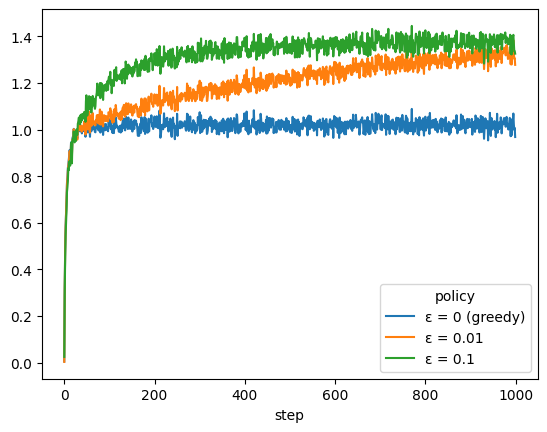

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 9883/6000000 [00:00<01:00, 98828.21it/s]

  0%|          | 20001/6000000 [00:00<00:59, 99923.26it/s]

  0%|          | 29994/6000000 [00:00<01:00, 99366.89it/s]

  1%|          | 40056/6000000 [00:00<00:59, 99855.84it/s]

  1%|          | 50175/6000000 [00:00<00:59, 100333.74it/s]

  1%|          | 60362/6000000 [00:00<00:58, 100852.36it/s]

  1%|          | 70568/6000000 [00:00<00:58, 101244.88it/s]

  1%|▏         | 80772/6000000 [00:00<00:58, 101496.66it/s]

  2%|▏         | 90948/6000000 [00:00<00:58, 101576.92it/s]

  2%|▏         | 101106/6000000 [00:01<00:58, 101240.41it/s]

  2%|▏         | 111259/6000000 [00:01<00:58, 101326.70it/s]

  2%|▏         | 121392/6000000 [00:01<00:58, 101221.62it/s]

  2%|▏         | 131534/6000000 [00:01<00:57, 101279.14it/s]

  2%|▏         | 141663/6000000 [00:01<00:57, 101250.56it/s]

  3%|▎         | 151820/6000000 [00:01<00:57, 101346.61it/s]

  3%|▎         | 161955/6000000 [00:01<00:57, 101039.83it/s]

  3%|▎         | 172127/6000000 [00:01<00:57, 101243.18it/s]

  3%|▎         | 182290/6000000 [00:01<00:57, 101357.12it/s]

  3%|▎         | 192426/6000000 [00:01<00:57, 101210.29it/s]

  3%|▎         | 202548/6000000 [00:02<00:57, 101137.22it/s]

  4%|▎         | 212662/6000000 [00:02<00:58, 99589.58it/s] 

  4%|▎         | 222691/6000000 [00:02<00:57, 99795.30it/s]

  4%|▍         | 232675/6000000 [00:02<00:58, 98524.82it/s]

  4%|▍         | 242863/6000000 [00:02<00:57, 99514.27it/s]

  4%|▍         | 252968/6000000 [00:02<00:57, 99968.10it/s]

  4%|▍         | 263006/6000000 [00:02<00:57, 100088.45it/s]

  5%|▍         | 273132/6000000 [00:02<00:57, 100435.63it/s]

  5%|▍         | 283205/6000000 [00:02<00:56, 100523.07it/s]

  5%|▍         | 293334/6000000 [00:02<00:56, 100751.66it/s]

  5%|▌         | 303411/6000000 [00:03<00:56, 100640.49it/s]

  5%|▌         | 313477/6000000 [00:03<00:56, 100645.35it/s]

  5%|▌         | 323575/6000000 [00:03<00:56, 100743.62it/s]

  6%|▌         | 333650/6000000 [00:03<00:56, 100034.44it/s]

  6%|▌         | 343695/6000000 [00:03<00:56, 100158.07it/s]

  6%|▌         | 353816/6000000 [00:03<00:56, 100471.64it/s]

  6%|▌         | 363865/6000000 [00:03<00:56, 100134.98it/s]

  6%|▌         | 373880/6000000 [00:03<00:56, 100004.96it/s]

  6%|▋         | 384001/6000000 [00:03<00:56, 100269.63it/s]

  7%|▋         | 394112/6000000 [00:03<00:55, 100519.32it/s]

  7%|▋         | 404273/6000000 [00:04<00:55, 100844.03it/s]

  7%|▋         | 414395/6000000 [00:04<00:55, 100956.37it/s]

  7%|▋         | 424491/6000000 [00:04<00:55, 100942.99it/s]

  7%|▋         | 434586/6000000 [00:04<00:56, 99306.45it/s] 

  7%|▋         | 444753/6000000 [00:04<00:55, 100005.50it/s]

  8%|▊         | 454856/6000000 [00:04<00:55, 100308.99it/s]

  8%|▊         | 464958/6000000 [00:04<00:55, 100518.62it/s]

  8%|▊         | 475046/6000000 [00:04<00:54, 100624.96it/s]

  8%|▊         | 485187/6000000 [00:04<00:54, 100859.15it/s]

  8%|▊         | 495389/6000000 [00:04<00:54, 101204.19it/s]

  8%|▊         | 505595/6000000 [00:05<00:54, 101459.93it/s]

  9%|▊         | 515742/6000000 [00:05<00:54, 101347.11it/s]

  9%|▉         | 525895/6000000 [00:05<00:53, 101401.20it/s]

  9%|▉         | 536036/6000000 [00:05<00:54, 101062.61it/s]

  9%|▉         | 546143/6000000 [00:05<00:54, 100964.57it/s]

  9%|▉         | 556240/6000000 [00:05<00:53, 100945.99it/s]

  9%|▉         | 566367/6000000 [00:05<00:53, 101042.94it/s]

 10%|▉         | 576472/6000000 [00:05<00:53, 101033.39it/s]

 10%|▉         | 586615/6000000 [00:05<00:53, 101150.10it/s]

 10%|▉         | 596774/6000000 [00:05<00:53, 101279.60it/s]

 10%|█         | 606903/6000000 [00:06<00:53, 101159.67it/s]

 10%|█         | 617020/6000000 [00:06<00:53, 101080.84it/s]

 10%|█         | 627240/6000000 [00:06<00:52, 101413.67it/s]

 11%|█         | 637382/6000000 [00:06<00:53, 99652.87it/s] 

 11%|█         | 647627/6000000 [00:06<00:53, 100477.20it/s]

 11%|█         | 657720/6000000 [00:06<00:53, 100610.40it/s]

 11%|█         | 667897/6000000 [00:06<00:52, 100953.28it/s]

 11%|█▏        | 678015/6000000 [00:06<00:52, 101020.16it/s]

 11%|█▏        | 688139/6000000 [00:06<00:52, 101083.19it/s]

 12%|█▏        | 698310/6000000 [00:06<00:52, 101268.02it/s]

 12%|█▏        | 708450/6000000 [00:07<00:52, 101305.99it/s]

 12%|█▏        | 718584/6000000 [00:07<00:52, 101314.69it/s]

 12%|█▏        | 728717/6000000 [00:07<00:52, 101136.08it/s]

 12%|█▏        | 738832/6000000 [00:07<00:52, 99417.26it/s] 

 12%|█▏        | 748937/6000000 [00:07<00:52, 99899.98it/s]

 13%|█▎        | 759001/6000000 [00:07<00:52, 100115.48it/s]

 13%|█▎        | 769119/6000000 [00:07<00:52, 100432.48it/s]

 13%|█▎        | 779293/6000000 [00:07<00:51, 100820.59it/s]

 13%|█▎        | 789426/6000000 [00:07<00:51, 100971.29it/s]

 13%|█▎        | 799589/6000000 [00:07<00:51, 101167.54it/s]

 13%|█▎        | 809707/6000000 [00:08<00:51, 101128.76it/s]

 14%|█▎        | 819821/6000000 [00:08<00:51, 101047.21it/s]

 14%|█▍        | 829927/6000000 [00:08<00:51, 101050.42it/s]

 14%|█▍        | 840033/6000000 [00:08<00:51, 100713.90it/s]

 14%|█▍        | 850323/6000000 [00:08<00:50, 101367.64it/s]

 14%|█▍        | 860532/6000000 [00:08<00:50, 101582.23it/s]

 15%|█▍        | 870691/6000000 [00:08<00:50, 101485.44it/s]

 15%|█▍        | 880840/6000000 [00:08<00:50, 101334.32it/s]

 15%|█▍        | 890974/6000000 [00:08<00:50, 101243.93it/s]

 15%|█▌        | 901099/6000000 [00:08<00:50, 100875.82it/s]

 15%|█▌        | 911221/6000000 [00:09<00:50, 100976.80it/s]

 15%|█▌        | 921349/6000000 [00:09<00:50, 101065.87it/s]

 16%|█▌        | 931456/6000000 [00:09<00:50, 101035.69it/s]

 16%|█▌        | 941560/6000000 [00:09<00:50, 100954.68it/s]

 16%|█▌        | 951656/6000000 [00:09<00:50, 99483.29it/s] 

 16%|█▌        | 961699/6000000 [00:09<00:50, 99762.81it/s]

 16%|█▌        | 971713/6000000 [00:09<00:50, 99874.87it/s]

 16%|█▋        | 981774/6000000 [00:09<00:50, 100092.48it/s]

 17%|█▋        | 991892/6000000 [00:09<00:49, 100415.18it/s]

 17%|█▋        | 1002001/6000000 [00:09<00:49, 100469.82it/s]

 17%|█▋        | 1012163/6000000 [00:10<00:49, 100812.94it/s]

 17%|█▋        | 1022278/6000000 [00:10<00:49, 100912.22it/s]

 17%|█▋        | 1032484/6000000 [00:10<00:49, 101255.35it/s]

 17%|█▋        | 1042619/6000000 [00:10<00:48, 101281.50it/s]

 18%|█▊        | 1052748/6000000 [00:10<00:48, 100999.16it/s]

 18%|█▊        | 1062873/6000000 [00:10<00:48, 101073.17it/s]

 18%|█▊        | 1072981/6000000 [00:10<00:48, 101061.75it/s]

 18%|█▊        | 1083088/6000000 [00:10<00:48, 100676.70it/s]

 18%|█▊        | 1093157/6000000 [00:10<00:48, 100625.13it/s]

 18%|█▊        | 1103253/6000000 [00:10<00:48, 100724.39it/s]

 19%|█▊        | 1113363/6000000 [00:11<00:48, 100835.22it/s]

 19%|█▊        | 1123449/6000000 [00:11<00:48, 100841.16it/s]

 19%|█▉        | 1133621/6000000 [00:11<00:48, 101101.68it/s]

 19%|█▉        | 1143732/6000000 [00:11<00:48, 101050.11it/s]

 19%|█▉        | 1153838/6000000 [00:11<00:49, 98886.27it/s] 

 19%|█▉        | 1163737/6000000 [00:11<00:48, 98775.62it/s]

 20%|█▉        | 1173637/6000000 [00:11<00:48, 98839.36it/s]

 20%|█▉        | 1183543/6000000 [00:11<00:48, 98902.98it/s]

 20%|█▉        | 1193471/6000000 [00:11<00:48, 99013.40it/s]

 20%|██        | 1203469/6000000 [00:11<00:48, 99301.84it/s]

 20%|██        | 1213415/6000000 [00:12<00:48, 99347.83it/s]

 20%|██        | 1223413/6000000 [00:12<00:47, 99535.13it/s]

 21%|██        | 1233372/6000000 [00:12<00:47, 99551.38it/s]

 21%|██        | 1243328/6000000 [00:12<00:47, 99359.11it/s]

 21%|██        | 1253265/6000000 [00:12<00:47, 99048.72it/s]

 21%|██        | 1263205/6000000 [00:12<00:47, 99151.13it/s]

 21%|██        | 1273158/6000000 [00:12<00:47, 99262.82it/s]

 21%|██▏       | 1283145/6000000 [00:12<00:47, 99441.90it/s]

 22%|██▏       | 1293090/6000000 [00:12<00:47, 99307.45it/s]

 22%|██▏       | 1303114/6000000 [00:12<00:47, 99584.44it/s]

 22%|██▏       | 1313073/6000000 [00:13<00:47, 99547.03it/s]

 22%|██▏       | 1323028/6000000 [00:13<00:47, 99504.30it/s]

 22%|██▏       | 1333040/6000000 [00:13<00:46, 99687.90it/s]

 22%|██▏       | 1343040/6000000 [00:13<00:46, 99779.91it/s]

 23%|██▎       | 1353019/6000000 [00:13<00:46, 99592.24it/s]

 23%|██▎       | 1363001/6000000 [00:13<00:46, 99622.28it/s]

 23%|██▎       | 1373002/6000000 [00:13<00:46, 99701.92it/s]

 23%|██▎       | 1383001/6000000 [00:13<00:46, 99707.64it/s]

 23%|██▎       | 1393043/6000000 [00:13<00:46, 99919.28it/s]

 23%|██▎       | 1403060/6000000 [00:13<00:45, 99992.44it/s]

 24%|██▎       | 1413060/6000000 [00:14<00:45, 99787.48it/s]

 24%|██▎       | 1423039/6000000 [00:14<00:45, 99729.74it/s]

 24%|██▍       | 1433035/6000000 [00:14<00:45, 99794.38it/s]

 24%|██▍       | 1443015/6000000 [00:14<00:45, 99657.98it/s]

 24%|██▍       | 1452981/6000000 [00:14<00:45, 99025.18it/s]

 24%|██▍       | 1462970/6000000 [00:14<00:45, 99281.25it/s]

 25%|██▍       | 1472937/6000000 [00:14<00:45, 99397.36it/s]

 25%|██▍       | 1482885/6000000 [00:14<00:45, 99419.63it/s]

 25%|██▍       | 1492828/6000000 [00:14<00:45, 99253.93it/s]

 25%|██▌       | 1502764/6000000 [00:14<00:45, 99284.92it/s]

 25%|██▌       | 1512704/6000000 [00:15<00:45, 99318.84it/s]

 25%|██▌       | 1522702/6000000 [00:15<00:44, 99515.26it/s]

 26%|██▌       | 1532700/6000000 [00:15<00:44, 99652.87it/s]

 26%|██▌       | 1542678/6000000 [00:15<00:44, 99688.45it/s]

 26%|██▌       | 1552647/6000000 [00:15<00:44, 99440.62it/s]

 26%|██▌       | 1562677/6000000 [00:15<00:44, 99697.64it/s]

 26%|██▌       | 1572647/6000000 [00:15<00:44, 99647.13it/s]

 26%|██▋       | 1582612/6000000 [00:15<00:44, 99607.82it/s]

 27%|██▋       | 1592620/6000000 [00:15<00:44, 99747.26it/s]

 27%|██▋       | 1602609/6000000 [00:15<00:44, 99789.65it/s]

 27%|██▋       | 1612589/6000000 [00:16<00:43, 99785.57it/s]

 27%|██▋       | 1622603/6000000 [00:16<00:43, 99890.45it/s]

 27%|██▋       | 1632670/6000000 [00:16<00:43, 100122.33it/s]

 27%|██▋       | 1642698/6000000 [00:16<00:43, 100169.36it/s]

 28%|██▊       | 1652715/6000000 [00:16<00:43, 100124.90it/s]

 28%|██▊       | 1662775/6000000 [00:16<00:43, 100267.11it/s]

 28%|██▊       | 1672858/6000000 [00:16<00:43, 100435.24it/s]

 28%|██▊       | 1682969/6000000 [00:16<00:42, 100634.84it/s]

 28%|██▊       | 1693033/6000000 [00:16<00:42, 100193.11it/s]

 28%|██▊       | 1703096/6000000 [00:16<00:42, 100323.07it/s]

 29%|██▊       | 1713138/6000000 [00:17<00:42, 100351.33it/s]

 29%|██▊       | 1723177/6000000 [00:17<00:42, 100360.72it/s]

 29%|██▉       | 1733214/6000000 [00:17<00:42, 100358.79it/s]

 29%|██▉       | 1743251/6000000 [00:17<00:42, 100205.28it/s]

 29%|██▉       | 1753272/6000000 [00:17<00:42, 100018.60it/s]

 29%|██▉       | 1763275/6000000 [00:17<00:42, 100014.12it/s]

 30%|██▉       | 1773277/6000000 [00:17<00:42, 99982.14it/s] 

 30%|██▉       | 1783276/6000000 [00:17<00:42, 99932.43it/s]

 30%|██▉       | 1793277/6000000 [00:17<00:42, 99953.05it/s]

 30%|███       | 1803292/6000000 [00:17<00:41, 100010.46it/s]

 30%|███       | 1813294/6000000 [00:18<00:41, 99990.41it/s] 

 30%|███       | 1823312/6000000 [00:18<00:41, 100045.92it/s]

 31%|███       | 1833380/6000000 [00:18<00:41, 100234.58it/s]

 31%|███       | 1843412/6000000 [00:18<00:41, 100259.29it/s]

 31%|███       | 1853438/6000000 [00:18<00:41, 99833.27it/s] 

 31%|███       | 1863475/6000000 [00:18<00:41, 99992.88it/s]

 31%|███       | 1873514/6000000 [00:18<00:41, 100111.64it/s]

 31%|███▏      | 1883577/6000000 [00:18<00:41, 100264.21it/s]

 32%|███▏      | 1893635/6000000 [00:18<00:40, 100358.44it/s]

 32%|███▏      | 1903719/6000000 [00:18<00:40, 100501.75it/s]

 32%|███▏      | 1913770/6000000 [00:19<00:40, 100422.41it/s]

 32%|███▏      | 1923818/6000000 [00:19<00:40, 100437.84it/s]

 32%|███▏      | 1933862/6000000 [00:19<00:40, 100362.54it/s]

 32%|███▏      | 1943899/6000000 [00:19<00:40, 100227.02it/s]

 33%|███▎      | 1953925/6000000 [00:19<00:40, 100234.71it/s]

 33%|███▎      | 1963949/6000000 [00:19<00:40, 100219.71it/s]

 33%|███▎      | 1973972/6000000 [00:19<00:40, 100077.44it/s]

 33%|███▎      | 1983980/6000000 [00:19<00:40, 99968.09it/s] 

 33%|███▎      | 1993977/6000000 [00:19<00:41, 97197.62it/s]

 33%|███▎      | 2003714/6000000 [00:19<00:41, 97238.75it/s]

 34%|███▎      | 2013450/6000000 [00:20<00:41, 95754.59it/s]

 34%|███▎      | 2023037/6000000 [00:20<00:41, 95188.22it/s]

 34%|███▍      | 2032564/6000000 [00:20<00:41, 94887.52it/s]

 34%|███▍      | 2042058/6000000 [00:20<00:42, 94096.68it/s]

 34%|███▍      | 2051472/6000000 [00:20<00:41, 94085.21it/s]

 34%|███▍      | 2060884/6000000 [00:20<00:42, 93735.10it/s]

 35%|███▍      | 2070260/6000000 [00:20<00:42, 93470.91it/s]

 35%|███▍      | 2079623/6000000 [00:20<00:41, 93517.19it/s]

 35%|███▍      | 2088976/6000000 [00:20<00:41, 93272.67it/s]

 35%|███▍      | 2098304/6000000 [00:21<00:41, 93114.47it/s]

 35%|███▌      | 2107632/6000000 [00:21<00:41, 93161.87it/s]

 35%|███▌      | 2117001/6000000 [00:21<00:41, 93199.26it/s]

 35%|███▌      | 2126322/6000000 [00:21<00:41, 93156.83it/s]

 36%|███▌      | 2135727/6000000 [00:21<00:41, 93423.86it/s]

 36%|███▌      | 2145070/6000000 [00:21<00:43, 87704.99it/s]

 36%|███▌      | 2153912/6000000 [00:21<00:44, 86288.16it/s]

 36%|███▌      | 2163200/6000000 [00:21<00:43, 88177.12it/s]

 36%|███▌      | 2172640/6000000 [00:21<00:42, 89984.41it/s]

 36%|███▋      | 2182001/6000000 [00:21<00:41, 91028.80it/s]

 37%|███▋      | 2191371/6000000 [00:22<00:41, 91815.65it/s]

 37%|███▋      | 2200880/6000000 [00:22<00:40, 92785.83it/s]

 37%|███▋      | 2210175/6000000 [00:22<00:40, 92648.73it/s]

 37%|███▋      | 2219451/6000000 [00:22<00:40, 92623.81it/s]

 37%|███▋      | 2228851/6000000 [00:22<00:40, 93032.38it/s]

 37%|███▋      | 2238302/6000000 [00:22<00:40, 93471.77it/s]

 37%|███▋      | 2247730/6000000 [00:22<00:40, 93712.43it/s]

 38%|███▊      | 2257105/6000000 [00:22<00:40, 93392.93it/s]

 38%|███▊      | 2266534/6000000 [00:22<00:39, 93659.72it/s]

 38%|███▊      | 2276072/6000000 [00:22<00:39, 94174.13it/s]

 38%|███▊      | 2285671/6000000 [00:23<00:39, 94716.15it/s]

 38%|███▊      | 2295171/6000000 [00:23<00:39, 94799.86it/s]

 38%|███▊      | 2304781/6000000 [00:23<00:38, 95188.00it/s]

 39%|███▊      | 2314301/6000000 [00:23<00:39, 94115.01it/s]

 39%|███▊      | 2323716/6000000 [00:23<00:39, 94015.23it/s]

 39%|███▉      | 2333120/6000000 [00:23<00:39, 92883.72it/s]

 39%|███▉      | 2342539/6000000 [00:23<00:39, 93267.96it/s]

 39%|███▉      | 2352001/6000000 [00:23<00:38, 93571.76it/s]

 39%|███▉      | 2361361/6000000 [00:23<00:38, 93566.78it/s]

 40%|███▉      | 2370749/6000000 [00:23<00:38, 93660.15it/s]

 40%|███▉      | 2380117/6000000 [00:24<00:38, 93576.62it/s]

 40%|███▉      | 2389554/6000000 [00:24<00:38, 93813.22it/s]

 40%|███▉      | 2398998/6000000 [00:24<00:38, 93999.58it/s]

 40%|████      | 2408399/6000000 [00:24<00:38, 93511.18it/s]

 40%|████      | 2417810/6000000 [00:24<00:38, 93689.66it/s]

 40%|████      | 2427180/6000000 [00:24<00:38, 93629.24it/s]

 41%|████      | 2436544/6000000 [00:24<00:38, 92364.34it/s]

 41%|████      | 2446011/6000000 [00:24<00:38, 93047.46it/s]

 41%|████      | 2455343/6000000 [00:24<00:38, 93125.81it/s]

 41%|████      | 2464723/6000000 [00:24<00:37, 93326.02it/s]

 41%|████      | 2474107/6000000 [00:25<00:37, 93477.56it/s]

 41%|████▏     | 2483457/6000000 [00:25<00:37, 93431.65it/s]

 42%|████▏     | 2492803/6000000 [00:25<00:37, 93439.30it/s]

 42%|████▏     | 2502148/6000000 [00:25<00:37, 93000.58it/s]

 42%|████▏     | 2511664/6000000 [00:25<00:37, 93644.67it/s]

 42%|████▏     | 2521030/6000000 [00:25<00:37, 93643.54it/s]

 42%|████▏     | 2530395/6000000 [00:25<00:37, 93505.50it/s]

 42%|████▏     | 2539747/6000000 [00:25<00:37, 93423.82it/s]

 42%|████▏     | 2549090/6000000 [00:25<00:37, 93120.21it/s]

 43%|████▎     | 2558403/6000000 [00:25<00:37, 92739.52it/s]

 43%|████▎     | 2567822/6000000 [00:26<00:36, 93171.08it/s]

 43%|████▎     | 2577140/6000000 [00:26<00:36, 93111.09it/s]

 43%|████▎     | 2586598/6000000 [00:26<00:36, 93548.21it/s]

 43%|████▎     | 2595954/6000000 [00:26<00:36, 93393.42it/s]

 43%|████▎     | 2605377/6000000 [00:26<00:36, 93642.65it/s]

 44%|████▎     | 2614742/6000000 [00:26<00:36, 93517.30it/s]

 44%|████▎     | 2624094/6000000 [00:26<00:36, 91742.18it/s]

 44%|████▍     | 2633336/6000000 [00:26<00:36, 91940.62it/s]

 44%|████▍     | 2642745/6000000 [00:26<00:36, 92577.28it/s]

 44%|████▍     | 2652260/6000000 [00:26<00:35, 93343.06it/s]

 44%|████▍     | 2661651/6000000 [00:27<00:35, 93511.88it/s]

 45%|████▍     | 2671207/6000000 [00:27<00:35, 94124.03it/s]

 45%|████▍     | 2680622/6000000 [00:27<00:35, 93669.33it/s]

 45%|████▍     | 2690011/6000000 [00:27<00:35, 93734.01it/s]

 45%|████▍     | 2699458/6000000 [00:27<00:35, 93952.95it/s]

 45%|████▌     | 2709001/6000000 [00:27<00:34, 94252.87it/s]

 45%|████▌     | 2718427/6000000 [00:27<00:35, 93374.77it/s]

 45%|████▌     | 2727873/6000000 [00:27<00:34, 93696.45it/s]

 46%|████▌     | 2737245/6000000 [00:27<00:34, 93475.22it/s]

 46%|████▌     | 2746645/6000000 [00:27<00:34, 93629.22it/s]

 46%|████▌     | 2756009/6000000 [00:28<00:34, 93545.58it/s]

 46%|████▌     | 2765365/6000000 [00:28<00:34, 93500.87it/s]

 46%|████▌     | 2774954/6000000 [00:28<00:34, 94215.25it/s]

 46%|████▋     | 2784377/6000000 [00:28<00:34, 93668.61it/s]

 47%|████▋     | 2793787/6000000 [00:28<00:34, 93796.47it/s]

 47%|████▋     | 2803168/6000000 [00:28<00:34, 93380.46it/s]

 47%|████▋     | 2812507/6000000 [00:28<00:34, 93372.57it/s]

 47%|████▋     | 2821845/6000000 [00:28<00:34, 93370.70it/s]

 47%|████▋     | 2831282/6000000 [00:28<00:33, 93666.75it/s]

 47%|████▋     | 2840658/6000000 [00:28<00:33, 93694.56it/s]

 48%|████▊     | 2850028/6000000 [00:29<00:33, 93095.75it/s]

 48%|████▊     | 2859464/6000000 [00:29<00:33, 93472.83it/s]

 48%|████▊     | 2868933/6000000 [00:29<00:33, 93835.72it/s]

 48%|████▊     | 2878318/6000000 [00:29<00:33, 93761.64it/s]

 48%|████▊     | 2887695/6000000 [00:29<00:33, 93672.20it/s]

 48%|████▊     | 2897063/6000000 [00:29<00:33, 93486.32it/s]

 48%|████▊     | 2906412/6000000 [00:29<00:33, 93196.26it/s]

 49%|████▊     | 2915868/6000000 [00:29<00:32, 93602.56it/s]

 49%|████▉     | 2925375/6000000 [00:29<00:32, 94040.13it/s]

 49%|████▉     | 2934905/6000000 [00:29<00:32, 94415.95it/s]

 49%|████▉     | 2944347/6000000 [00:30<00:32, 93994.35it/s]

 49%|████▉     | 2953748/6000000 [00:30<00:32, 93749.46it/s]

 49%|████▉     | 2963124/6000000 [00:30<00:32, 93303.73it/s]

 50%|████▉     | 2972456/6000000 [00:30<00:32, 93296.81it/s]

 50%|████▉     | 2981791/6000000 [00:30<00:32, 93312.38it/s]

 50%|████▉     | 2991123/6000000 [00:30<00:32, 93156.77it/s]

 50%|█████     | 3000439/6000000 [00:30<00:33, 90881.18it/s]

 50%|█████     | 3009795/6000000 [00:30<00:32, 91667.17it/s]

 50%|█████     | 3019086/6000000 [00:30<00:32, 92033.96it/s]

 50%|█████     | 3028345/6000000 [00:30<00:32, 92197.01it/s]

 51%|█████     | 3037621/6000000 [00:31<00:32, 92362.74it/s]

 51%|█████     | 3047068/6000000 [00:31<00:31, 92989.84it/s]

 51%|█████     | 3056370/6000000 [00:31<00:32, 89787.43it/s]

 51%|█████     | 3065870/6000000 [00:31<00:32, 91307.20it/s]

 51%|█████▏    | 3075266/6000000 [00:31<00:31, 92087.82it/s]

 51%|█████▏    | 3084699/6000000 [00:31<00:31, 92751.15it/s]

 52%|█████▏    | 3093992/6000000 [00:31<00:31, 92804.26it/s]

 52%|█████▏    | 3103292/6000000 [00:31<00:31, 92860.32it/s]

 52%|█████▏    | 3112838/6000000 [00:31<00:30, 93635.77it/s]

 52%|█████▏    | 3122207/6000000 [00:32<00:30, 93558.90it/s]

 52%|█████▏    | 3131567/6000000 [00:32<00:30, 93494.28it/s]

 52%|█████▏    | 3140919/6000000 [00:32<00:30, 93031.15it/s]

 53%|█████▎    | 3150225/6000000 [00:32<00:30, 93025.02it/s]

 53%|█████▎    | 3159580/6000000 [00:32<00:30, 93179.21it/s]

 53%|█████▎    | 3168917/6000000 [00:32<00:30, 93234.19it/s]

 53%|█████▎    | 3178242/6000000 [00:32<00:30, 93134.70it/s]

 53%|█████▎    | 3187569/6000000 [00:32<00:30, 93172.84it/s]

 53%|█████▎    | 3196887/6000000 [00:32<00:30, 93065.61it/s]

 53%|█████▎    | 3206267/6000000 [00:32<00:29, 93285.07it/s]

 54%|█████▎    | 3215710/6000000 [00:33<00:29, 93626.65it/s]

 54%|█████▍    | 3225073/6000000 [00:33<00:29, 93243.62it/s]

 54%|█████▍    | 3234456/6000000 [00:33<00:29, 93417.34it/s]

 54%|█████▍    | 3243935/6000000 [00:33<00:29, 93826.20it/s]

 54%|█████▍    | 3253318/6000000 [00:33<00:29, 93669.86it/s]

 54%|█████▍    | 3262747/6000000 [00:33<00:29, 93853.01it/s]

 55%|█████▍    | 3272133/6000000 [00:33<00:29, 93701.24it/s]

 55%|█████▍    | 3281571/6000000 [00:33<00:28, 93900.20it/s]

 55%|█████▍    | 3290967/6000000 [00:33<00:28, 93916.59it/s]

 55%|█████▌    | 3300359/6000000 [00:33<00:28, 93728.48it/s]

 55%|█████▌    | 3309733/6000000 [00:34<00:28, 93360.84it/s]

 55%|█████▌    | 3319078/6000000 [00:34<00:28, 93381.31it/s]

 55%|█████▌    | 3328539/6000000 [00:34<00:28, 93746.13it/s]

 56%|█████▌    | 3338001/6000000 [00:34<00:28, 93948.68it/s]

 56%|█████▌    | 3347405/6000000 [00:34<00:28, 93974.03it/s]

 56%|█████▌    | 3356803/6000000 [00:34<00:28, 93922.72it/s]

 56%|█████▌    | 3366213/6000000 [00:34<00:28, 93974.18it/s]

 56%|█████▋    | 3375717/6000000 [00:34<00:27, 94292.97it/s]

 56%|█████▋    | 3385147/6000000 [00:34<00:27, 93572.17it/s]

 57%|█████▋    | 3394583/6000000 [00:34<00:27, 93805.23it/s]

 57%|█████▋    | 3403965/6000000 [00:35<00:27, 93664.96it/s]

 57%|█████▋    | 3413333/6000000 [00:35<00:27, 93635.99it/s]

 57%|█████▋    | 3422698/6000000 [00:35<00:27, 93613.11it/s]

 57%|█████▋    | 3432060/6000000 [00:35<00:27, 93312.49it/s]

 57%|█████▋    | 3441405/6000000 [00:35<00:27, 93350.95it/s]

 58%|█████▊    | 3450741/6000000 [00:35<00:27, 93348.62it/s]

 58%|█████▊    | 3460077/6000000 [00:35<00:27, 93246.82it/s]

 58%|█████▊    | 3469469/6000000 [00:35<00:27, 93447.36it/s]

 58%|█████▊    | 3478814/6000000 [00:35<00:27, 91088.85it/s]

 58%|█████▊    | 3487936/6000000 [00:35<00:30, 81186.67it/s]

 58%|█████▊    | 3497193/6000000 [00:36<00:29, 84288.12it/s]

 58%|█████▊    | 3506594/6000000 [00:36<00:28, 87011.38it/s]

 59%|█████▊    | 3515914/6000000 [00:36<00:27, 88778.33it/s]

 59%|█████▉    | 3525236/6000000 [00:36<00:27, 90064.35it/s]

 59%|█████▉    | 3534611/6000000 [00:36<00:27, 91143.84it/s]

 59%|█████▉    | 3544001/6000000 [00:36<00:26, 91778.82it/s]

 59%|█████▉    | 3553496/6000000 [00:36<00:26, 92716.18it/s]

 59%|█████▉    | 3562870/6000000 [00:36<00:26, 93019.87it/s]

 60%|█████▉    | 3572194/6000000 [00:36<00:26, 92930.18it/s]

 60%|█████▉    | 3581557/6000000 [00:36<00:25, 93137.04it/s]

 60%|█████▉    | 3590938/6000000 [00:37<00:25, 93337.94it/s]

 60%|██████    | 3600280/6000000 [00:37<00:25, 93079.24it/s]

 60%|██████    | 3609716/6000000 [00:37<00:25, 93461.06it/s]

 60%|██████    | 3619066/6000000 [00:37<00:25, 93276.82it/s]

 60%|██████    | 3628580/6000000 [00:37<00:25, 93832.18it/s]

 61%|██████    | 3638000/6000000 [00:37<00:25, 93941.55it/s]

 61%|██████    | 3647396/6000000 [00:37<00:25, 93278.93it/s]

 61%|██████    | 3656726/6000000 [00:37<00:25, 93255.81it/s]

 61%|██████    | 3666053/6000000 [00:37<00:25, 91351.05it/s]

 61%|██████▏   | 3675312/6000000 [00:37<00:25, 91715.13it/s]

 61%|██████▏   | 3684491/6000000 [00:38<00:25, 91660.54it/s]

 62%|██████▏   | 3693662/6000000 [00:38<00:26, 87010.43it/s]

 62%|██████▏   | 3702864/6000000 [00:38<00:25, 88449.26it/s]

 62%|██████▏   | 3712182/6000000 [00:38<00:25, 89824.32it/s]

 62%|██████▏   | 3721391/6000000 [00:38<00:25, 90488.22it/s]

 62%|██████▏   | 3730652/6000000 [00:38<00:24, 91113.67it/s]

 62%|██████▏   | 3739885/6000000 [00:38<00:24, 91472.41it/s]

 62%|██████▏   | 3749115/6000000 [00:38<00:24, 91718.21it/s]

 63%|██████▎   | 3758324/6000000 [00:38<00:24, 91827.75it/s]

 63%|██████▎   | 3767660/6000000 [00:38<00:24, 92283.07it/s]

 63%|██████▎   | 3777037/6000000 [00:39<00:23, 92725.70it/s]

 63%|██████▎   | 3786478/6000000 [00:39<00:23, 93228.36it/s]

 63%|██████▎   | 3795804/6000000 [00:39<00:23, 93215.89it/s]

 63%|██████▎   | 3805221/6000000 [00:39<00:23, 93501.51it/s]

 64%|██████▎   | 3814573/6000000 [00:39<00:23, 93489.91it/s]

 64%|██████▎   | 3824000/6000000 [00:39<00:23, 93723.20it/s]

 64%|██████▍   | 3833567/6000000 [00:39<00:22, 94304.64it/s]

 64%|██████▍   | 3842998/6000000 [00:39<00:22, 94273.85it/s]

 64%|██████▍   | 3852426/6000000 [00:39<00:23, 92992.76it/s]

 64%|██████▍   | 3861776/6000000 [00:39<00:22, 93142.79it/s]

 65%|██████▍   | 3871112/6000000 [00:40<00:22, 93205.94it/s]

 65%|██████▍   | 3880435/6000000 [00:40<00:22, 93180.32it/s]

 65%|██████▍   | 3889917/6000000 [00:40<00:22, 93667.97it/s]

 65%|██████▍   | 3899286/6000000 [00:40<00:22, 93449.92it/s]

 65%|██████▌   | 3908632/6000000 [00:40<00:22, 93187.75it/s]

 65%|██████▌   | 3917997/6000000 [00:40<00:22, 93325.30it/s]

 65%|██████▌   | 3927390/6000000 [00:40<00:22, 93505.51it/s]

 66%|██████▌   | 3936780/6000000 [00:40<00:22, 93621.89it/s]

 66%|██████▌   | 3946143/6000000 [00:40<00:22, 90687.52it/s]

 66%|██████▌   | 3955509/6000000 [00:41<00:22, 91556.66it/s]

 66%|██████▌   | 3964834/6000000 [00:41<00:22, 92054.35it/s]

 66%|██████▌   | 3974303/6000000 [00:41<00:21, 92833.51it/s]

 66%|██████▋   | 3983643/6000000 [00:41<00:21, 93001.77it/s]

 67%|██████▋   | 3993022/6000000 [00:41<00:21, 93236.19it/s]

 67%|██████▋   | 4002532/6000000 [00:41<00:21, 93792.52it/s]

 67%|██████▋   | 4012115/6000000 [00:41<00:21, 94401.20it/s]

 67%|██████▋   | 4021881/6000000 [00:41<00:20, 95375.37it/s]

 67%|██████▋   | 4031472/6000000 [00:41<00:20, 95532.90it/s]

 67%|██████▋   | 4041130/6000000 [00:41<00:20, 95844.21it/s]

 68%|██████▊   | 4050886/6000000 [00:42<00:20, 96355.85it/s]

 68%|██████▊   | 4060523/6000000 [00:42<00:20, 95733.16it/s]

 68%|██████▊   | 4070098/6000000 [00:42<00:20, 95090.39it/s]

 68%|██████▊   | 4079836/6000000 [00:42<00:20, 95770.79it/s]

 68%|██████▊   | 4089415/6000000 [00:42<00:20, 95446.60it/s]

 68%|██████▊   | 4099001/6000000 [00:42<00:19, 95547.38it/s]

 68%|██████▊   | 4108714/6000000 [00:42<00:19, 96018.46it/s]

 69%|██████▊   | 4118317/6000000 [00:42<00:19, 95935.49it/s]

 69%|██████▉   | 4127926/6000000 [00:42<00:19, 95981.33it/s]

 69%|██████▉   | 4137525/6000000 [00:42<00:19, 93820.50it/s]

 69%|██████▉   | 4146986/6000000 [00:43<00:19, 94051.69it/s]

 69%|██████▉   | 4156433/6000000 [00:43<00:19, 94173.35it/s]

 69%|██████▉   | 4166001/6000000 [00:43<00:19, 94505.82it/s]

 70%|██████▉   | 4175662/6000000 [00:43<00:19, 95131.95it/s]

 70%|██████▉   | 4185205/6000000 [00:43<00:19, 95220.82it/s]

 70%|██████▉   | 4194841/6000000 [00:43<00:18, 95559.74it/s]

 70%|███████   | 4204435/6000000 [00:43<00:18, 95672.83it/s]

 70%|███████   | 4214004/6000000 [00:43<00:18, 95315.78it/s]

 70%|███████   | 4223610/6000000 [00:43<00:18, 95536.45it/s]

 71%|███████   | 4233165/6000000 [00:43<00:18, 95506.53it/s]

 71%|███████   | 4242758/6000000 [00:44<00:18, 95632.65it/s]

 71%|███████   | 4252356/6000000 [00:44<00:18, 95735.15it/s]

 71%|███████   | 4261930/6000000 [00:44<00:18, 95633.66it/s]

 71%|███████   | 4271519/6000000 [00:44<00:18, 95708.29it/s]

 71%|███████▏  | 4281091/6000000 [00:44<00:18, 94882.17it/s]

 72%|███████▏  | 4290581/6000000 [00:44<00:18, 94463.61it/s]

 72%|███████▏  | 4300029/6000000 [00:44<00:18, 90177.31it/s]

 72%|███████▏  | 4309748/6000000 [00:44<00:18, 92200.03it/s]

 72%|███████▏  | 4319251/6000000 [00:44<00:18, 93025.54it/s]

 72%|███████▏  | 4328815/6000000 [00:44<00:17, 93794.99it/s]

 72%|███████▏  | 4338439/6000000 [00:45<00:17, 94517.19it/s]

 72%|███████▏  | 4348038/6000000 [00:45<00:17, 94953.46it/s]

 73%|███████▎  | 4357684/6000000 [00:45<00:17, 95402.07it/s]

 73%|███████▎  | 4367233/6000000 [00:45<00:17, 95050.07it/s]

 73%|███████▎  | 4376913/6000000 [00:45<00:16, 95571.52it/s]

 73%|███████▎  | 4386475/6000000 [00:45<00:16, 95256.43it/s]

 73%|███████▎  | 4396004/6000000 [00:45<00:16, 95199.50it/s]

 73%|███████▎  | 4405901/6000000 [00:45<00:16, 96325.38it/s]

 74%|███████▎  | 4415536/6000000 [00:45<00:16, 95927.18it/s]

 74%|███████▍  | 4425207/6000000 [00:45<00:16, 96158.20it/s]

 74%|███████▍  | 4434953/6000000 [00:46<00:16, 96546.90it/s]

 74%|███████▍  | 4444609/6000000 [00:46<00:16, 96155.48it/s]

 74%|███████▍  | 4454312/6000000 [00:46<00:16, 96414.80it/s]

 74%|███████▍  | 4463990/6000000 [00:46<00:15, 96522.31it/s]

 75%|███████▍  | 4473643/6000000 [00:46<00:15, 96178.52it/s]

 75%|███████▍  | 4483262/6000000 [00:46<00:15, 96140.41it/s]

 75%|███████▍  | 4492877/6000000 [00:46<00:15, 95661.03it/s]

 75%|███████▌  | 4502695/6000000 [00:46<00:15, 96411.17it/s]

 75%|███████▌  | 4512338/6000000 [00:46<00:15, 96174.16it/s]

 75%|███████▌  | 4521957/6000000 [00:46<00:15, 96098.66it/s]

 76%|███████▌  | 4531568/6000000 [00:47<00:15, 92418.78it/s]

 76%|███████▌  | 4541016/6000000 [00:47<00:15, 93016.90it/s]

 76%|███████▌  | 4550777/6000000 [00:47<00:15, 94363.36it/s]

 76%|███████▌  | 4560346/6000000 [00:47<00:15, 94754.01it/s]

 76%|███████▌  | 4570001/6000000 [00:47<00:15, 95177.13it/s]

 76%|███████▋  | 4579554/6000000 [00:47<00:14, 95282.02it/s]

 76%|███████▋  | 4589258/6000000 [00:47<00:14, 95803.50it/s]

 77%|███████▋  | 4598844/6000000 [00:47<00:14, 95694.09it/s]

 77%|███████▋  | 4608418/6000000 [00:47<00:14, 95314.86it/s]

 77%|███████▋  | 4618050/6000000 [00:47<00:14, 95613.95it/s]

 77%|███████▋  | 4627614/6000000 [00:48<00:14, 94678.23it/s]

 77%|███████▋  | 4637227/6000000 [00:48<00:14, 95108.59it/s]

 77%|███████▋  | 4646834/6000000 [00:48<00:14, 95395.02it/s]

 78%|███████▊  | 4656376/6000000 [00:48<00:14, 95278.05it/s]

 78%|███████▊  | 4665906/6000000 [00:48<00:14, 95163.72it/s]

 78%|███████▊  | 4675559/6000000 [00:48<00:13, 95571.03it/s]

 78%|███████▊  | 4685227/6000000 [00:48<00:13, 95901.07it/s]

 78%|███████▊  | 4694818/6000000 [00:48<00:13, 95862.98it/s]

 78%|███████▊  | 4704405/6000000 [00:48<00:13, 95644.10it/s]

 79%|███████▊  | 4714072/6000000 [00:48<00:13, 95949.40it/s]

 79%|███████▊  | 4723668/6000000 [00:49<00:13, 95153.51it/s]

 79%|███████▉  | 4733266/6000000 [00:49<00:13, 95398.55it/s]

 79%|███████▉  | 4743014/6000000 [00:49<00:13, 96017.26it/s]

 79%|███████▉  | 4752617/6000000 [00:49<00:13, 95605.52it/s]

 79%|███████▉  | 4762184/6000000 [00:49<00:12, 95621.99it/s]

 80%|███████▉  | 4771748/6000000 [00:49<00:12, 95434.30it/s]

 80%|███████▉  | 4781317/6000000 [00:49<00:12, 95507.93it/s]

 80%|███████▉  | 4790940/6000000 [00:49<00:12, 95722.51it/s]

 80%|████████  | 4800513/6000000 [00:49<00:12, 95628.95it/s]

 80%|████████  | 4810139/6000000 [00:49<00:12, 95817.13it/s]

 80%|████████  | 4819721/6000000 [00:50<00:12, 95313.88it/s]

 80%|████████  | 4829254/6000000 [00:50<00:12, 94896.31it/s]

 81%|████████  | 4838806/6000000 [00:50<00:12, 95079.88it/s]

 81%|████████  | 4848519/6000000 [00:50<00:12, 95689.71it/s]

 81%|████████  | 4858089/6000000 [00:50<00:11, 95237.53it/s]

 81%|████████  | 4867638/6000000 [00:50<00:11, 95312.27it/s]

 81%|████████▏ | 4877170/6000000 [00:50<00:11, 95279.24it/s]

 81%|████████▏ | 4886716/6000000 [00:50<00:11, 95332.99it/s]

 82%|████████▏ | 4896419/6000000 [00:50<00:11, 95840.23it/s]

 82%|████████▏ | 4906004/6000000 [00:50<00:11, 95594.26it/s]

 82%|████████▏ | 4915564/6000000 [00:51<00:11, 95595.12it/s]

 82%|████████▏ | 4925198/6000000 [00:51<00:11, 95817.07it/s]

 82%|████████▏ | 4934780/6000000 [00:51<00:11, 95715.36it/s]

 82%|████████▏ | 4944352/6000000 [00:51<00:11, 95476.61it/s]

 83%|████████▎ | 4954001/6000000 [00:51<00:10, 95752.57it/s]

 83%|████████▎ | 4963577/6000000 [00:51<00:10, 95674.19it/s]

 83%|████████▎ | 4973189/6000000 [00:51<00:10, 95807.05it/s]

 83%|████████▎ | 4982770/6000000 [00:51<00:10, 95373.68it/s]

 83%|████████▎ | 4992308/6000000 [00:51<00:10, 95035.14it/s]

 83%|████████▎ | 5002008/6000000 [00:51<00:10, 95619.56it/s]

 84%|████████▎ | 5011571/6000000 [00:52<00:10, 95436.80it/s]

 84%|████████▎ | 5021116/6000000 [00:52<00:10, 93132.82it/s]

 84%|████████▍ | 5030875/6000000 [00:52<00:10, 94442.11it/s]

 84%|████████▍ | 5040570/6000000 [00:52<00:10, 95183.90it/s]

 84%|████████▍ | 5050313/6000000 [00:52<00:09, 95849.50it/s]

 84%|████████▍ | 5060001/6000000 [00:52<00:09, 96047.31it/s]

 84%|████████▍ | 5069611/6000000 [00:52<00:09, 95994.78it/s]

 85%|████████▍ | 5079214/6000000 [00:52<00:09, 95885.50it/s]

 85%|████████▍ | 5088895/6000000 [00:52<00:09, 96159.65it/s]

 85%|████████▍ | 5098513/6000000 [00:53<00:09, 95738.30it/s]

 85%|████████▌ | 5108089/6000000 [00:53<00:09, 95629.80it/s]

 85%|████████▌ | 5117714/6000000 [00:53<00:09, 95813.16it/s]

 85%|████████▌ | 5127305/6000000 [00:53<00:09, 95841.26it/s]

 86%|████████▌ | 5137001/6000000 [00:53<00:08, 96039.64it/s]

 86%|████████▌ | 5146606/6000000 [00:53<00:08, 95745.07it/s]

 86%|████████▌ | 5156181/6000000 [00:53<00:08, 95556.70it/s]

 86%|████████▌ | 5165737/6000000 [00:53<00:08, 95350.16it/s]

 86%|████████▋ | 5175276/6000000 [00:53<00:08, 95360.18it/s]

 86%|████████▋ | 5184813/6000000 [00:53<00:08, 95314.15it/s]

 87%|████████▋ | 5194345/6000000 [00:54<00:08, 95251.03it/s]

 87%|████████▋ | 5203937/6000000 [00:54<00:08, 95450.14it/s]

 87%|████████▋ | 5213483/6000000 [00:54<00:08, 94958.09it/s]

 87%|████████▋ | 5223178/6000000 [00:54<00:08, 95550.14it/s]

 87%|████████▋ | 5232748/6000000 [00:54<00:08, 95594.09it/s]

 87%|████████▋ | 5242308/6000000 [00:54<00:07, 95503.00it/s]

 88%|████████▊ | 5251933/6000000 [00:54<00:07, 95723.74it/s]

 88%|████████▊ | 5261784/6000000 [00:54<00:07, 96557.50it/s]

 88%|████████▊ | 5271441/6000000 [00:54<00:07, 95882.98it/s]

 88%|████████▊ | 5281031/6000000 [00:54<00:07, 95666.77it/s]

 88%|████████▊ | 5290696/6000000 [00:55<00:07, 95957.51it/s]

 88%|████████▊ | 5300392/6000000 [00:55<00:07, 96256.88it/s]

 89%|████████▊ | 5310019/6000000 [00:55<00:07, 95710.40it/s]

 89%|████████▊ | 5319622/6000000 [00:55<00:07, 95805.12it/s]

 89%|████████▉ | 5329253/6000000 [00:55<00:06, 95955.84it/s]

 89%|████████▉ | 5338966/6000000 [00:55<00:06, 96304.61it/s]

 89%|████████▉ | 5348601/6000000 [00:55<00:06, 96316.65it/s]

 89%|████████▉ | 5358348/6000000 [00:55<00:06, 96660.03it/s]

 89%|████████▉ | 5368015/6000000 [00:55<00:06, 96145.69it/s]

 90%|████████▉ | 5377631/6000000 [00:55<00:06, 96116.66it/s]

 90%|████████▉ | 5387270/6000000 [00:56<00:06, 96197.73it/s]

 90%|████████▉ | 5396898/6000000 [00:56<00:06, 96221.48it/s]

 90%|█████████ | 5406521/6000000 [00:56<00:06, 91892.68it/s]

 90%|█████████ | 5416061/6000000 [00:56<00:06, 92908.54it/s]

 90%|█████████ | 5425730/6000000 [00:56<00:06, 94016.32it/s]

 91%|█████████ | 5435385/6000000 [00:56<00:05, 94762.18it/s]

 91%|█████████ | 5445068/6000000 [00:56<00:05, 95374.06it/s]

 91%|█████████ | 5454645/6000000 [00:56<00:05, 95491.02it/s]

 91%|█████████ | 5464204/6000000 [00:56<00:05, 95479.69it/s]

 91%|█████████ | 5473807/6000000 [00:56<00:05, 95641.31it/s]

 91%|█████████▏| 5483665/6000000 [00:57<00:05, 96519.36it/s]

 92%|█████████▏| 5493321/6000000 [00:57<00:05, 96195.68it/s]

 92%|█████████▏| 5503004/6000000 [00:57<00:05, 96382.37it/s]

 92%|█████████▏| 5512689/6000000 [00:57<00:05, 96520.44it/s]

 92%|█████████▏| 5522349/6000000 [00:57<00:04, 96543.46it/s]

 92%|█████████▏| 5532005/6000000 [00:57<00:04, 96107.87it/s]

 92%|█████████▏| 5541723/6000000 [00:57<00:04, 96427.17it/s]

 93%|█████████▎| 5551367/6000000 [00:57<00:04, 96145.11it/s]

 93%|█████████▎| 5560983/6000000 [00:57<00:04, 95860.68it/s]

 93%|█████████▎| 5570721/6000000 [00:57<00:04, 96312.10it/s]

 93%|█████████▎| 5580353/6000000 [00:58<00:04, 95654.00it/s]

 93%|█████████▎| 5589920/6000000 [00:58<00:04, 95588.95it/s]

 93%|█████████▎| 5599480/6000000 [00:58<00:04, 95010.92it/s]

 93%|█████████▎| 5609001/6000000 [00:58<00:04, 94939.92it/s]

 94%|█████████▎| 5618594/6000000 [00:58<00:04, 95234.10it/s]

 94%|█████████▍| 5628175/6000000 [00:58<00:03, 95404.25it/s]

 94%|█████████▍| 5637716/6000000 [00:58<00:03, 95398.45it/s]

 94%|█████████▍| 5647257/6000000 [00:58<00:03, 95128.31it/s]

 94%|█████████▍| 5656901/6000000 [00:58<00:03, 95519.24it/s]

 94%|█████████▍| 5666495/6000000 [00:58<00:03, 95644.90it/s]

 95%|█████████▍| 5676221/6000000 [00:59<00:03, 96127.28it/s]

 95%|█████████▍| 5685921/6000000 [00:59<00:03, 96387.75it/s]

 95%|█████████▍| 5695561/6000000 [00:59<00:03, 96353.17it/s]

 95%|█████████▌| 5705197/6000000 [00:59<00:03, 92457.98it/s]

 95%|█████████▌| 5714800/6000000 [00:59<00:03, 93496.99it/s]

 95%|█████████▌| 5724428/6000000 [00:59<00:02, 94312.27it/s]

 96%|█████████▌| 5734116/6000000 [00:59<00:02, 95069.63it/s]

 96%|█████████▌| 5743872/6000000 [00:59<00:02, 95806.32it/s]

 96%|█████████▌| 5753465/6000000 [00:59<00:02, 95626.98it/s]

 96%|█████████▌| 5763090/6000000 [00:59<00:02, 95810.56it/s]

 96%|█████████▌| 5772813/6000000 [01:00<00:02, 96232.71it/s]

 96%|█████████▋| 5782498/6000000 [01:00<00:02, 96416.08it/s]

 97%|█████████▋| 5792143/6000000 [01:00<00:02, 96380.59it/s]

 97%|█████████▋| 5801784/6000000 [01:00<00:02, 95592.39it/s]

 97%|█████████▋| 5811427/6000000 [01:00<00:01, 95840.20it/s]

 97%|█████████▋| 5821014/6000000 [01:00<00:01, 95547.22it/s]

 97%|█████████▋| 5830780/6000000 [01:00<00:01, 96175.19it/s]

 97%|█████████▋| 5840399/6000000 [01:00<00:01, 96103.58it/s]

 98%|█████████▊| 5850011/6000000 [01:00<00:01, 95523.67it/s]

 98%|█████████▊| 5859808/6000000 [01:00<00:01, 96251.98it/s]

 98%|█████████▊| 5869435/6000000 [01:01<00:01, 95788.48it/s]

 98%|█████████▊| 5879016/6000000 [01:01<00:01, 95757.37it/s]

 98%|█████████▊| 5888593/6000000 [01:01<00:01, 95720.36it/s]

 98%|█████████▊| 5898166/6000000 [01:01<00:01, 91225.35it/s]

 98%|█████████▊| 5907937/6000000 [01:01<00:00, 93100.38it/s]

 99%|█████████▊| 5917423/6000000 [01:01<00:00, 93611.53it/s]

 99%|█████████▉| 5927007/6000000 [01:01<00:00, 94267.82it/s]

 99%|█████████▉| 5936882/6000000 [01:01<00:00, 95594.14it/s]

 99%|█████████▉| 5946683/6000000 [01:01<00:00, 96310.15it/s]

 99%|█████████▉| 5956326/6000000 [01:01<00:00, 95507.60it/s]

 99%|█████████▉| 5965887/6000000 [01:02<00:00, 95195.49it/s]

100%|█████████▉| 5975636/6000000 [01:02<00:00, 95875.38it/s]

100%|█████████▉| 5985293/6000000 [01:02<00:00, 96080.03it/s]

100%|█████████▉| 5994905/6000000 [01:02<00:00, 95744.10it/s]

100%|██████████| 6000000/6000000 [01:02<00:00, 96084.41it/s]

<Axes: xlabel='step'>

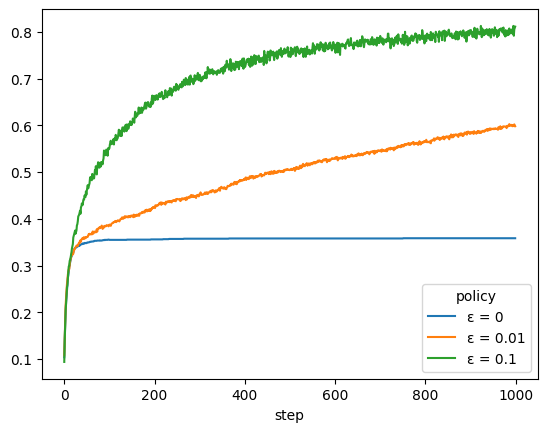

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 66/180000 [00:00<04:32, 659.63it/s]

  0%|          | 873/180000 [00:00<00:35, 5014.79it/s]

  1%|          | 1635/180000 [00:00<00:28, 6196.12it/s]

  1%|▏         | 2394/180000 [00:00<00:26, 6741.21it/s]

  2%|▏         | 3153/180000 [00:00<00:25, 7039.91it/s]

  2%|▏         | 3912/180000 [00:00<00:24, 7220.33it/s]

  3%|▎         | 4634/180000 [00:00<00:25, 6991.37it/s]

  3%|▎         | 5346/180000 [00:00<00:24, 7031.18it/s]

  3%|▎         | 6051/180000 [00:00<00:25, 6838.02it/s]

  4%|▍         | 6861/180000 [00:01<00:24, 7212.39it/s]

  4%|▍         | 7602/180000 [00:01<00:23, 7268.80it/s]

  5%|▍         | 8347/180000 [00:01<00:23, 7322.73it/s]

  5%|▌         | 9099/180000 [00:01<00:23, 7379.64it/s]

  5%|▌         | 9848/180000 [00:01<00:22, 7411.83it/s]

  6%|▌         | 10591/180000 [00:01<00:22, 7417.02it/s]

  6%|▋         | 11334/180000 [00:01<00:22, 7415.84it/s]

  7%|▋         | 12076/180000 [00:01<00:23, 7140.36it/s]

  7%|▋         | 12882/180000 [00:01<00:22, 7408.68it/s]

  8%|▊         | 13626/180000 [00:01<00:22, 7400.76it/s]

  8%|▊         | 14368/180000 [00:02<00:22, 7405.99it/s]

  8%|▊         | 15115/180000 [00:02<00:22, 7424.06it/s]

  9%|▉         | 15859/180000 [00:02<00:23, 7093.32it/s]

  9%|▉         | 16599/180000 [00:02<00:22, 7181.34it/s]

 10%|▉         | 17334/180000 [00:02<00:22, 7230.05it/s]

 10%|█         | 18060/180000 [00:02<00:23, 6827.73it/s]

 10%|█         | 18867/180000 [00:02<00:22, 7177.39it/s]

 11%|█         | 19619/180000 [00:02<00:22, 7275.17it/s]

 11%|█▏        | 20364/180000 [00:02<00:21, 7323.51it/s]

 12%|█▏        | 21105/180000 [00:02<00:21, 7348.64it/s]

 12%|█▏        | 21851/180000 [00:03<00:21, 7381.00it/s]

 13%|█▎        | 22596/180000 [00:03<00:21, 7398.21it/s]

 13%|█▎        | 23338/180000 [00:03<00:22, 7105.97it/s]

 13%|█▎        | 24052/180000 [00:03<00:22, 6923.02it/s]

 14%|█▍        | 24854/180000 [00:03<00:21, 7237.36it/s]

 14%|█▍        | 25596/180000 [00:03<00:21, 7289.14it/s]

 15%|█▍        | 26337/180000 [00:03<00:20, 7322.54it/s]

 15%|█▌        | 27076/180000 [00:03<00:20, 7341.27it/s]

 15%|█▌        | 27818/180000 [00:03<00:20, 7363.56it/s]

 16%|█▌        | 28557/180000 [00:03<00:20, 7367.94it/s]

 16%|█▋        | 29295/180000 [00:04<00:20, 7367.12it/s]

 17%|█▋        | 30033/180000 [00:04<00:21, 7083.82it/s]

 17%|█▋        | 30838/180000 [00:04<00:20, 7363.64it/s]

 18%|█▊        | 31587/180000 [00:04<00:20, 7397.41it/s]

 18%|█▊        | 32334/180000 [00:04<00:19, 7413.83it/s]

 18%|█▊        | 33081/180000 [00:04<00:19, 7425.18it/s]

 19%|█▉        | 33825/180000 [00:04<00:19, 7421.81it/s]

 19%|█▉        | 34568/180000 [00:04<00:19, 7407.26it/s]

 20%|█▉        | 35310/180000 [00:04<00:19, 7402.50it/s]

 20%|██        | 36051/180000 [00:05<00:20, 7118.01it/s]

 20%|██        | 36851/180000 [00:05<00:19, 7374.24it/s]

 21%|██        | 37600/180000 [00:05<00:19, 7407.06it/s]

 21%|██▏       | 38344/180000 [00:05<00:19, 7416.52it/s]

 22%|██▏       | 39093/180000 [00:05<00:18, 7436.48it/s]

 22%|██▏       | 39852/180000 [00:05<00:18, 7479.90it/s]

 23%|██▎       | 40601/180000 [00:05<00:18, 7479.41it/s]

 23%|██▎       | 41352/180000 [00:05<00:18, 7487.41it/s]

 23%|██▎       | 42102/180000 [00:05<00:19, 7220.09it/s]

 24%|██▍       | 42897/180000 [00:05<00:18, 7431.79it/s]

 24%|██▍       | 43644/180000 [00:06<00:18, 7442.79it/s]

 25%|██▍       | 44390/180000 [00:06<00:18, 7425.76it/s]

 25%|██▌       | 45134/180000 [00:06<00:18, 7407.43it/s]

 25%|██▌       | 45876/180000 [00:06<00:18, 7316.11it/s]

 26%|██▌       | 46620/180000 [00:06<00:18, 7352.41it/s]

 26%|██▋       | 47358/180000 [00:06<00:18, 7357.82it/s]

 27%|██▋       | 48095/180000 [00:06<00:18, 7104.12it/s]

 27%|██▋       | 48882/180000 [00:06<00:17, 7321.61it/s]

 28%|██▊       | 49617/180000 [00:06<00:17, 7315.73it/s]

 28%|██▊       | 50350/180000 [00:06<00:17, 7307.81it/s]

 28%|██▊       | 51084/180000 [00:07<00:17, 7316.51it/s]

 29%|██▉       | 51820/180000 [00:07<00:17, 7329.27it/s]

 29%|██▉       | 52564/180000 [00:07<00:17, 7361.71it/s]

 30%|██▉       | 53304/180000 [00:07<00:17, 7367.59it/s]

 30%|███       | 54042/180000 [00:07<00:17, 7061.07it/s]

 30%|███       | 54759/180000 [00:07<00:17, 7088.68it/s]

 31%|███       | 55470/180000 [00:07<00:18, 6877.36it/s]

 31%|███       | 56191/180000 [00:07<00:17, 6972.73it/s]

 32%|███▏      | 56931/180000 [00:07<00:17, 7094.41it/s]

 32%|███▏      | 57664/180000 [00:07<00:17, 7162.46it/s]

 32%|███▏      | 58401/180000 [00:08<00:16, 7218.23it/s]

 33%|███▎      | 59130/180000 [00:08<00:16, 7237.97it/s]

 33%|███▎      | 59866/180000 [00:08<00:16, 7273.56it/s]

 34%|███▎      | 60594/180000 [00:08<00:16, 7118.27it/s]

 34%|███▍      | 61334/180000 [00:08<00:16, 7200.27it/s]

 34%|███▍      | 62076/180000 [00:08<00:16, 7263.63it/s]

 35%|███▍      | 62826/180000 [00:08<00:15, 7329.18it/s]

 35%|███▌      | 63570/180000 [00:08<00:15, 7358.52it/s]

 36%|███▌      | 64314/180000 [00:08<00:15, 7380.64it/s]

 36%|███▌      | 65058/180000 [00:08<00:15, 7392.36it/s]

 37%|███▋      | 65798/180000 [00:09<00:15, 7386.00it/s]

 37%|███▋      | 66537/180000 [00:09<00:15, 7208.15it/s]

 37%|███▋      | 67280/180000 [00:09<00:15, 7272.62it/s]

 38%|███▊      | 68022/180000 [00:09<00:15, 7312.84it/s]

 38%|███▊      | 68754/180000 [00:09<00:15, 7028.45it/s]

 39%|███▊      | 69489/180000 [00:09<00:15, 7118.07it/s]

 39%|███▉      | 70231/180000 [00:09<00:15, 7205.26it/s]

 39%|███▉      | 70965/180000 [00:09<00:15, 7242.96it/s]

 40%|███▉      | 71707/180000 [00:09<00:14, 7294.78it/s]

 40%|████      | 72438/180000 [00:10<00:15, 6831.36it/s]

 41%|████      | 73191/180000 [00:10<00:15, 7029.51it/s]

 41%|████      | 73935/180000 [00:10<00:14, 7144.66it/s]

 41%|████▏     | 74676/180000 [00:10<00:14, 7217.14it/s]

 42%|████▏     | 75413/180000 [00:10<00:14, 7261.99it/s]

 42%|████▏     | 76142/180000 [00:10<00:14, 7102.91it/s]

 43%|████▎     | 76872/180000 [00:10<00:14, 7158.94it/s]

 43%|████▎     | 77616/180000 [00:10<00:14, 7240.84it/s]

 44%|████▎     | 78342/180000 [00:10<00:14, 7093.42it/s]

 44%|████▍     | 79108/180000 [00:10<00:13, 7258.02it/s]

 44%|████▍     | 79849/180000 [00:11<00:13, 7301.72it/s]

 45%|████▍     | 80583/180000 [00:11<00:13, 7307.03it/s]

 45%|████▌     | 81321/180000 [00:11<00:13, 7322.99it/s]

 46%|████▌     | 82056/180000 [00:11<00:13, 7327.33it/s]

 46%|████▌     | 82794/180000 [00:11<00:13, 7342.23it/s]

 46%|████▋     | 83529/180000 [00:11<00:13, 7326.33it/s]

 47%|████▋     | 84262/180000 [00:11<00:13, 7135.21it/s]

 47%|████▋     | 85021/180000 [00:11<00:13, 7268.17it/s]

 48%|████▊     | 85749/180000 [00:11<00:13, 6968.69it/s]

 48%|████▊     | 86480/180000 [00:11<00:13, 7066.49it/s]

 48%|████▊     | 87219/180000 [00:12<00:12, 7153.20it/s]

 49%|████▉     | 87955/180000 [00:12<00:12, 7213.74it/s]

 49%|████▉     | 88688/180000 [00:12<00:12, 7247.70it/s]

 50%|████▉     | 89423/180000 [00:12<00:12, 7277.81it/s]

 50%|█████     | 90152/180000 [00:12<00:12, 7057.63it/s]

 51%|█████     | 90909/180000 [00:12<00:12, 7204.79it/s]

 51%|█████     | 91650/180000 [00:12<00:12, 7260.71it/s]

 51%|█████▏    | 92378/180000 [00:12<00:12, 7266.16it/s]

 52%|█████▏    | 93118/180000 [00:12<00:11, 7305.80it/s]

 52%|█████▏    | 93855/180000 [00:12<00:11, 7322.49it/s]

 53%|█████▎    | 94595/180000 [00:13<00:11, 7345.52it/s]

 53%|█████▎    | 95340/180000 [00:13<00:11, 7370.50it/s]

 53%|█████▎    | 96078/180000 [00:13<00:11, 7099.61it/s]

 54%|█████▍    | 96869/180000 [00:13<00:11, 7335.54it/s]

 54%|█████▍    | 97605/180000 [00:13<00:11, 7341.67it/s]

 55%|█████▍    | 98341/180000 [00:13<00:11, 7040.50it/s]

 55%|█████▌    | 99084/180000 [00:13<00:11, 7147.69it/s]

 55%|█████▌    | 99822/180000 [00:13<00:11, 7211.92it/s]

 56%|█████▌    | 100560/180000 [00:13<00:10, 7256.45it/s]

 56%|█████▋    | 101298/180000 [00:14<00:10, 7289.14it/s]

 57%|█████▋    | 102029/180000 [00:14<00:11, 7009.24it/s]

 57%|█████▋    | 102834/180000 [00:14<00:10, 7309.98it/s]

 58%|█████▊    | 103573/180000 [00:14<00:10, 7332.39it/s]

 58%|█████▊    | 104309/180000 [00:14<00:10, 7336.70it/s]

 58%|█████▊    | 105045/180000 [00:14<00:10, 7325.79it/s]

 59%|█████▉    | 105779/180000 [00:14<00:10, 7020.50it/s]

 59%|█████▉    | 106512/180000 [00:14<00:10, 7107.63it/s]

 60%|█████▉    | 107243/180000 [00:14<00:10, 7166.58it/s]

 60%|█████▉    | 107979/180000 [00:14<00:09, 7222.19it/s]

 60%|██████    | 108703/180000 [00:15<00:10, 7127.74it/s]

 61%|██████    | 109437/180000 [00:15<00:09, 7186.90it/s]

 61%|██████    | 110173/180000 [00:15<00:09, 7236.71it/s]

 62%|██████▏   | 110908/180000 [00:15<00:09, 7270.20it/s]

 62%|██████▏   | 111645/180000 [00:15<00:09, 7299.81it/s]

 62%|██████▏   | 112389/180000 [00:15<00:09, 7340.20it/s]

 63%|██████▎   | 113127/180000 [00:15<00:09, 7348.79it/s]

 63%|██████▎   | 113874/180000 [00:15<00:08, 7383.56it/s]

 64%|██████▎   | 114613/180000 [00:15<00:09, 7236.23it/s]

 64%|██████▍   | 115358/180000 [00:15<00:08, 7298.60it/s]

 65%|██████▍   | 116102/180000 [00:16<00:08, 7340.20it/s]

 65%|██████▍   | 116844/180000 [00:16<00:08, 7362.28it/s]

 65%|██████▌   | 117591/180000 [00:16<00:08, 7392.34it/s]

 66%|██████▌   | 118332/180000 [00:16<00:08, 7395.60it/s]

 66%|██████▌   | 119073/180000 [00:16<00:08, 7396.72it/s]

 67%|██████▋   | 119817/180000 [00:16<00:08, 7407.51it/s]

 67%|██████▋   | 120558/180000 [00:16<00:08, 7221.33it/s]

 67%|██████▋   | 121311/180000 [00:16<00:08, 7307.90it/s]

 68%|██████▊   | 122058/180000 [00:16<00:07, 7354.49it/s]

 68%|██████▊   | 122802/180000 [00:16<00:07, 7378.01it/s]

 69%|██████▊   | 123546/180000 [00:17<00:07, 7395.06it/s]

 69%|██████▉   | 124290/180000 [00:17<00:07, 7408.43it/s]

 69%|██████▉   | 125032/180000 [00:17<00:07, 7411.74it/s]

 70%|██████▉   | 125778/180000 [00:17<00:07, 7425.47it/s]

 70%|███████   | 126521/180000 [00:17<00:07, 7273.48it/s]

 71%|███████   | 127281/180000 [00:17<00:07, 7366.95it/s]

 71%|███████   | 128019/180000 [00:17<00:07, 7369.72it/s]

 72%|███████▏  | 128757/180000 [00:17<00:06, 7362.49it/s]

 72%|███████▏  | 129501/180000 [00:17<00:06, 7383.71it/s]

 72%|███████▏  | 130245/180000 [00:17<00:06, 7394.68it/s]

 73%|███████▎  | 130985/180000 [00:18<00:06, 7384.98it/s]

 73%|███████▎  | 131724/180000 [00:18<00:06, 7384.13it/s]

 74%|███████▎  | 132463/180000 [00:18<00:06, 7212.66it/s]

 74%|███████▍  | 133214/180000 [00:18<00:06, 7299.76it/s]

 74%|███████▍  | 133955/180000 [00:18<00:06, 7332.14it/s]

 75%|███████▍  | 134689/180000 [00:18<00:06, 7329.51it/s]

 75%|███████▌  | 135423/180000 [00:18<00:06, 7324.29it/s]

 76%|███████▌  | 136156/180000 [00:18<00:05, 7320.19it/s]

 76%|███████▌  | 136898/180000 [00:18<00:05, 7349.37it/s]

 76%|███████▋  | 137634/180000 [00:18<00:05, 7349.50it/s]

 77%|███████▋  | 138370/180000 [00:19<00:05, 7156.54it/s]

 77%|███████▋  | 139120/180000 [00:19<00:05, 7257.00it/s]

 78%|███████▊  | 139860/180000 [00:19<00:05, 7296.49it/s]

 78%|███████▊  | 140601/180000 [00:19<00:05, 7327.95it/s]

 79%|███████▊  | 141342/180000 [00:19<00:05, 7351.23it/s]

 79%|███████▉  | 142078/180000 [00:19<00:05, 7323.55it/s]

 79%|███████▉  | 142818/180000 [00:19<00:05, 7345.26it/s]

 80%|███████▉  | 143553/180000 [00:19<00:04, 7346.39it/s]

 80%|████████  | 144288/180000 [00:19<00:04, 7143.90it/s]

 81%|████████  | 145054/180000 [00:20<00:04, 7293.99it/s]

 81%|████████  | 145797/180000 [00:20<00:04, 7333.63it/s]

 81%|████████▏ | 146538/180000 [00:20<00:04, 7355.30it/s]

 82%|████████▏ | 147288/180000 [00:20<00:04, 7393.76it/s]

 82%|████████▏ | 148038/180000 [00:20<00:04, 7424.75it/s]

 83%|████████▎ | 148788/180000 [00:20<00:04, 7444.81it/s]

 83%|████████▎ | 149533/180000 [00:20<00:04, 7435.17it/s]

 83%|████████▎ | 150277/180000 [00:20<00:04, 7215.64it/s]

 84%|████████▍ | 151001/180000 [00:20<00:04, 7036.95it/s]

 84%|████████▍ | 151744/180000 [00:20<00:03, 7149.64it/s]

 85%|████████▍ | 152487/180000 [00:21<00:03, 7226.15it/s]

 85%|████████▌ | 153211/180000 [00:21<00:03, 7219.91it/s]

 86%|████████▌ | 153957/180000 [00:21<00:03, 7285.40it/s]

 86%|████████▌ | 154695/180000 [00:21<00:03, 7312.77it/s]

 86%|████████▋ | 155433/180000 [00:21<00:03, 7328.02it/s]

 87%|████████▋ | 156167/180000 [00:21<00:03, 7092.79it/s]

 87%|████████▋ | 156960/180000 [00:21<00:03, 7334.58it/s]

 88%|████████▊ | 157696/180000 [00:21<00:03, 7334.65it/s]

 88%|████████▊ | 158431/180000 [00:21<00:03, 7173.00it/s]

 88%|████████▊ | 159160/180000 [00:21<00:02, 7205.90it/s]

 89%|████████▉ | 159891/180000 [00:22<00:02, 7236.21it/s]

 89%|████████▉ | 160622/180000 [00:22<00:02, 7257.28it/s]

 90%|████████▉ | 161349/180000 [00:22<00:02, 7257.67it/s]

 90%|█████████ | 162076/180000 [00:22<00:02, 6989.78it/s]

 90%|█████████ | 162864/180000 [00:22<00:02, 7247.01it/s]

 91%|█████████ | 163611/180000 [00:22<00:02, 7307.02it/s]

 91%|█████████▏| 164358/180000 [00:22<00:02, 7352.26it/s]

 92%|█████████▏| 165095/180000 [00:22<00:02, 7337.64it/s]

 92%|█████████▏| 165830/180000 [00:22<00:01, 7315.46it/s]

 93%|█████████▎| 166572/180000 [00:22<00:01, 7342.61it/s]

 93%|█████████▎| 167313/180000 [00:23<00:01, 7360.45it/s]

 93%|█████████▎| 168050/180000 [00:23<00:01, 7085.44it/s]

 94%|█████████▍| 168850/180000 [00:23<00:01, 7350.27it/s]

 94%|█████████▍| 169592/180000 [00:23<00:01, 7370.65it/s]

 95%|█████████▍| 170332/180000 [00:23<00:01, 7378.07it/s]

 95%|█████████▌| 171075/180000 [00:23<00:01, 7391.33it/s]

 95%|█████████▌| 171816/180000 [00:23<00:01, 7384.12it/s]

 96%|█████████▌| 172556/180000 [00:23<00:01, 7388.04it/s]

 96%|█████████▋| 173296/180000 [00:23<00:00, 7056.85it/s]

 97%|█████████▋| 174006/180000 [00:24<00:00, 6824.84it/s]

 97%|█████████▋| 174799/180000 [00:24<00:00, 7138.88it/s]

 98%|█████████▊| 175539/180000 [00:24<00:00, 7211.81it/s]

 98%|█████████▊| 176286/180000 [00:24<00:00, 7287.15it/s]

 98%|█████████▊| 177033/180000 [00:24<00:00, 7339.89it/s]

 99%|█████████▉| 177777/180000 [00:24<00:00, 7367.08it/s]

 99%|█████████▉| 178518/180000 [00:24<00:00, 7377.06it/s]

100%|█████████▉| 179262/180000 [00:24<00:00, 7393.68it/s]

100%|██████████| 180000/180000 [00:24<00:00, 7254.93it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.